# How to use the AI Gemini API

## Prerequisites
- Use Python 3.9
- Install the google-generativeai SDK
- Get an API key from Google AI Studio https://aistudio.google.com/app/apikey
- Copy your key and move it to the home directory of the VM or device


In [1]:
# verify python 3.9
import sys
print(sys.version_info)
assert sys.version_info >= (3, 9)
import random
import json
import pandas as pd
from IPython.display import Markdown, display

sys.version_info(major=3, minor=9, micro=5, releaselevel='final', serial=0)


## Upgrade to Python 3.9 Ubunto

- Search if the version of python is available in the current Ubuntu repos

```bash
apt search python3.9
```

- if packages are listed. Install with the following command

```bash
sudo apt install python3.9
```

- If the package is not listed, download the entire file and install from the command line.


## Get your API key from Google AI Studio

[https://aistudio.google.com/app/apikey](https://aistudio.google.com/app/apikey)

- Copy the key

## Update the API key in your environment

Using a terminal, run the save_key.sh bash file and enter the key at the prompt.

This script will do the following:

- Create a $Home/.gcp folder
- Save the API key in the gemini.key file by running this bash file
- Add a new environment variable GEMINI_KEY

```bash
./save_key.sh
```

> For production environments, set the correct permissions for that file or use a keyvault (recommended)


## Setup a virtual environment

- We recommend the use of a virtual environment to run this.
```bash
pip install pipenv
pipenv shell
```

> You can run this without `pipenv` by installing only the dependencies locally

## Install the Gemini API dependencies from the terminal

- Use PIPEnv to update the depencies
```bash
pipenv shell
pipenv sync
```
> pipenv sync installs the dependencies from the Pipfile


- Or manually install the dependencies (No pipEnv)

## Install the API requests module
```bash
pipenv install -q google-generativeai
pipenv install requests
pipenv install pandas numpy
pipenv install plotly matplotlib scipy
```


## Run the code example

In [2]:
import os

# import the GEMINI API
import google.generativeai as gemini

# model names context window 001=1M 002=2M (tokens)
models = {
  'pro': 'gemini-1.5-pro-001',
  'flash': 'gemini-1.5-flash-001',
}

# get the key reference
api_key = os.getenv('GEMINI_KEY')
model_name = models['flash']

def printMarkdown(result):
  """
  Prints the given result as Markdown in a Jupyter Notebook.

  Args:
    result: The string containing the Markdown content.
  """
  display(Markdown(result))



/home/ozkary/.local/share/virtualenvs/python-dNT3Lhuf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
if api_key is not None:
    gemini.configure(api_key=api_key)

    # create a service instance    
    model = gemini.GenerativeModel(model_name)
    prompt = 'We are learning about LLM models and statistical analysis charts. What information do you need to help explain the charts?'
    
    # generate content
    result = model.generate_content(prompt)
    printMarkdown(result.text)
else:
    print('The key was not loaded')

To effectively explain statistical analysis charts related to LLM models, I need some context. Please tell me more about the specific charts you're working with! Here's what I need to know:

**About the Chart:**

* **Type of chart:** What type of chart is it? (e.g., bar chart, line chart, scatter plot, histogram, box plot)
* **Data represented:** What specific data is being visualized? (e.g., accuracy scores, training time, model size, loss function values)
* **Axes:** What are the labels and units of the axes?
* **Legend:** Does the chart have a legend, and what does it explain?
* **Key features:** Are there any significant patterns, trends, outliers, or anomalies in the chart?

**About the LLM:**

* **Model name:** What is the name of the LLM model being analyzed? (e.g., GPT-3, BERT, LaMDA)
* **Task:** What task is the LLM performing? (e.g., text generation, translation, question answering)
* **Dataset:** What dataset was used to train or evaluate the LLM?
* **Experiment:** What is the overall goal of the experiment or analysis represented by the chart?

**Example:**

"I'm trying to understand a bar chart that shows the accuracy scores of different LLM models on a text classification task. The x-axis shows the model name (e.g., GPT-3, BERT, LaMDA), and the y-axis shows the accuracy score (0-1). The chart shows that GPT-3 has the highest accuracy, followed by BERT and then LaMDA. I'm curious about why GPT-3 performs better on this task."

Once you provide me with more information, I can help you:

* **Interpret the chart:** Explain the trends, patterns, and relationships shown in the chart.
* **Connect the chart to LLM concepts:**  Relate the chart data to LLM architecture, training process, and evaluation metrics.
* **Generate insights:** Offer explanations for the observed results and potential implications for LLM research.

Please share the details of your chart and LLM model, and I'll do my best to help! 


## Let's Create Our charts from AR device simulated data
#### Magic Leap One
![AR Magic Leap One](./magic-leap-one.jpg)

In [4]:
from data_prompts import build_chart_prompt, build_analysis_prompt, build_chart_image_prompt
from eye_piece import generate_ar_eyepiece_data, create_control_chart, create_histogram_bell_curve_chart, create_box_plot

# get the dataframe with manufacturing data for AR devices
df = generate_ar_eyepiece_data()
df.head()

,Timestamp,Sample_ID,Focal_Length,Curvature,Angle,Clarity,Distortion,Durability,Focal_Length_UCL,Focal_Length_LCL,Curvature_UCL,Curvature_LCL,Angle_UCL,Angle_LCL,Clarity_UCL,Clarity_LCL,Distortion_UCL,Distortion_LCL,Durability_UCL,Durability_LCL
0,2025-01-22 12:29:21.115202,1,49.654494,2.481991,44.823602,9.078220,1.184503,7.818332,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0
1,2025-01-22 12:29:22.115202,2,49.335860,2.423387,45.425151,9.963272,0.813907,8.072857,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0
2,2025-01-22 12:29:23.115202,3,49.620107,2.525020,44.819670,8.957137,0.983279,8.056436,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0
3,2025-01-22 12:29:24.115202,4,50.569523,2.542152,45.114401,9.061664,0.763447,8.290225,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0
4,2025-01-22 12:29:25.115202,5,49.809140,2.553996,44.866291,9.188765,1.079799,8.247312,51.5,48.5,2.65,2.35,45.6,44.4,8.0,7.0,1.3,0.7,7.0,6.0


In [5]:
# get the target columns (feature engineering) for analysis
target_cols = df.columns[~df.columns.str.contains("Times|_ID|_LCL|_UCL")].to_list()
print(target_cols) 

['Focal_Length', 'Curvature', 'Angle', 'Clarity', 'Distortion', 'Durability']


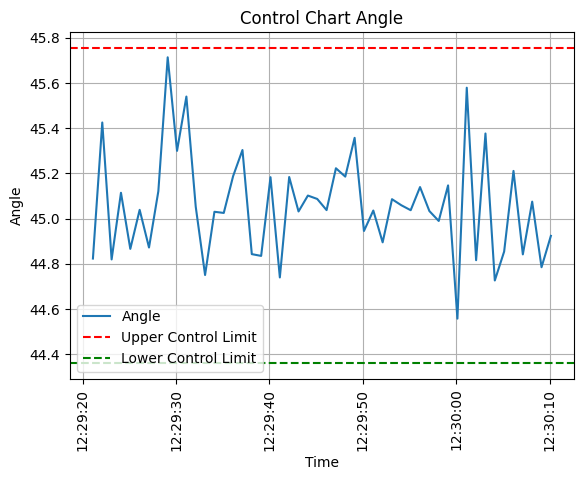

In [6]:
# get a data series and create a control chart
label =  random.choice(target_cols)
controlChartData = create_control_chart(df, label)

In [7]:
(controlChartData)

{'chart type': 'control chart',
 'title': 'Control Chart Angle',
 'data': [44.823601685399304,
  45.425151049139096,
  44.81967008518621,
  45.114400974995476,
  44.86629139641851,
  45.03894009897188,
  44.87233459307562,
  45.12126348491203,
  45.713376928868904,
  45.29975967038627,
  45.539810513631544,
  45.05279998941473,
  44.75083316141278,
  45.030393971210245,
  45.025250968604304,
  45.18799089321439,
  45.30350928083034,
  44.843143491323005,
  44.83529024769351,
  45.18333165018596,
  44.740030720974374,
  45.18422773272503,
  45.031825666549146,
  45.10206279078008,
  45.08712154574763,
  45.03775655886561,
  45.222784103853165,
  45.18585032362953,
  45.357255021727504,
  44.94551021667741,
  45.03586370823663,
  44.895273473742165,
  45.08600828907117,
  45.05919329005462,
  45.03731553473675,
  45.13962309034103,
  45.033597144224096,
  44.98980307503605,
  45.1469468756809,
  44.557879574654685,
  45.578967290091036,
  44.81622839713063,
  45.37655335886835,
  44.7265

In [8]:
chartData = build_chart_prompt(controlChartData)
controlChartPrompt = chartData
printMarkdown(chartData)

* Chart type: control chart
* Title: Control Chart Angle
* Data: 44.82360, 45.42515, 44.81967, 45.11440, 44.86629, 45.03894, 44.87233, 45.12126, 45.71338, 45.29976, 45.53981, 45.05280, 44.75083, 45.03039, 45.02525, 45.18799, 45.30351, 44.84314, 44.83529, 45.18333, 44.74003, 45.18423, 45.03183, 45.10206, 45.08712, 45.03776, 45.22278, 45.18585, 45.35726, 44.94551, 45.03586, 44.89527, 45.08601, 45.05919, 45.03732, 45.13962, 45.03360, 44.98980, 45.14695, 44.55788, 45.57897, 44.81623, 45.37655, 44.72658, 44.85460, 45.21103, 44.84206, 45.07515, 44.78519, 44.92392
* Upper limit: 45.75466
* Lower limit: 44.36188

In [9]:
# let AI help us with the control chart using Natural Language (NL)
context = f'We are looking at a control chart measuring {label} with this manufacturing data:'
description = 'We are plotting a numeric series with value and control limits.  Analyze the provided chart data to answer the question.'
question = 'Can you tell us the purpose of this chart, and if our data results, specifically considering the provided data points and limits, show that there is an action item for us?'


prompt = build_analysis_prompt(context, description, chartData, question)
printMarkdown(prompt)

We are looking at a control chart measuring Angle with this manufacturing data:
 
    * Chart type: control chart
* Title: Control Chart Angle
* Data: 44.82360, 45.42515, 44.81967, 45.11440, 44.86629, 45.03894, 44.87233, 45.12126, 45.71338, 45.29976, 45.53981, 45.05280, 44.75083, 45.03039, 45.02525, 45.18799, 45.30351, 44.84314, 44.83529, 45.18333, 44.74003, 45.18423, 45.03183, 45.10206, 45.08712, 45.03776, 45.22278, 45.18585, 45.35726, 44.94551, 45.03586, 44.89527, 45.08601, 45.05919, 45.03732, 45.13962, 45.03360, 44.98980, 45.14695, 44.55788, 45.57897, 44.81623, 45.37655, 44.72658, 44.85460, 45.21103, 44.84206, 45.07515, 44.78519, 44.92392
* Upper limit: 45.75466
* Lower limit: 44.36188

    We are plotting a numeric series with value and control limits.  Analyze the provided chart data to answer the question.

    Can you tell us the purpose of this chart, and if our data results, specifically considering the provided data points and limits, show that there is an action item for us?
    

In [10]:
result = model.generate_content(prompt)
printMarkdown(result.text)

The purpose of this control chart is to monitor the process of angle measurement in a manufacturing setting. It helps identify any shifts or trends in the process that might indicate a problem. The chart plots the angle measurements over time, along with upper and lower control limits.

**Analyzing the data:**

* **Upper Control Limit (UCL):** 45.75466
* **Lower Control Limit (LCL):** 44.36188

By examining the data points, we can see that **all the points fall within the control limits**. This indicates that the process is **in statistical control**.  There are no points that exceed the limits, nor are there any obvious patterns or trends suggesting an issue.

**Action Item:**

Since the data points fall within the control limits, **there is no immediate action item**. The process is currently stable and within acceptable limits. 

**However, it's important to note:**

* **Continuously monitor the chart:**  Even though the process is in control currently, it's essential to regularly monitor the chart for any potential changes or deviations from the expected pattern.
* **Investigate potential causes of variation:** While no points are out of control now, a slight shift in the process could lead to issues down the line. Investigate any potential causes of variation within the process, even if they are small, to ensure long-term stability.

**In summary:** The control chart shows the process is stable, and no action is needed at this time. However, continuous monitoring and proactive investigation of potential variation sources are essential to maintain process control. 


AttributeError: 'list' object has no attribute 'tolist'

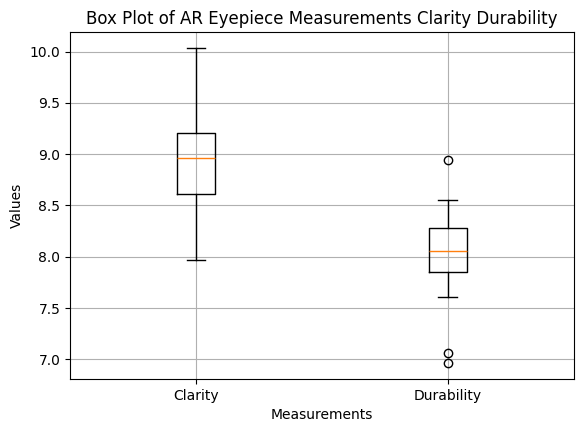

In [11]:
# create a box plot for labels with similar scale
labels = ['Clarity', 'Durability']
boxPlotData = create_box_plot(df, labels)
chartData = build_chart_prompt(boxPlotData)

In [28]:
# let AI help us with the box plot chart
context = f'Analyzing a box plot for {" ".join(label)} manufacturing data. The chart details with data are below:'
description = 'Box plots visually represent the distribution of numerical data, showing quartiles, median, and potential outliers. They help identify data skewness and variability.'
question = f'Based on the box plot data for {label}, interpret the key features (median, quartiles, outliers).  Does the chart indicate any potential issues or areas requiring further investigation in the manufacturing process? Explain your reasoning.'

prompt = build_analysis_prompt(context, description, chartData, question)

result = model.generate_content(prompt)
printMarkdown(result.text)


Let's analyze the box plot data for Angle's manufacturing process:

**Understanding the Box Plot Elements:**

* **Median:**  The line within the box represents the median (50th percentile), showing the central tendency of the data.
* **Quartiles:** The box itself encompasses the interquartile range (IQR), which is the spread between the first quartile (25th percentile) and the third quartile (75th percentile). This represents the middle 50% of the data.
* **Whiskers:** The lines extending from the box are the whiskers, usually reaching to 1.5 times the IQR beyond the quartiles.
* **Outliers:** Any data points that fall beyond the whiskers are considered potential outliers.

**Interpreting the Box Plot Data:**

You haven't provided the actual box plot itself, so I'll assume typical box plot conventions.  Here's a general interpretation based on the data provided:

* **Clarity:** 
    * The median appears to be around 9.0, suggesting a generally high level of clarity.
    * The box is relatively narrow, indicating that the middle 50% of clarity measurements are tightly clustered.
    * There may be a few outliers on the higher end (above 10.0) which could represent exceptionally clear units. 
* **Durability:**
    * The median appears to be around 8.0, indicating a good level of durability.
    * The box is wider than the clarity box, suggesting more variability in durability measurements. 
    * There might be a few outliers on the lower end (below 7.5) which could represent units with lower durability.

**Potential Issues and Areas for Investigation:**

* **Variability in Durability:** The wider box for durability suggests that there's more variation in the durability of the units compared to their clarity. This might warrant investigation to understand the factors contributing to this variability.
* **Outliers:** While a few outliers are typical, an excessive number or outliers that are significantly far from the main data set could indicate potential problems in the manufacturing process. 
    * For clarity, outliers on the high end might be positive and indicate exceptional units.
    * For durability, outliers on the low end might be problematic, requiring investigation to identify the root cause and prevent further issues.

**Recommendations for Further Investigation:**

* **Root Cause Analysis:** For both clarity and durability, investigate the outliers and try to identify the root causes.  Were there specific batches or manufacturing steps that contributed to these deviations?
* **Process Optimization:** If there's significant variability in durability, explore ways to improve consistency in the manufacturing process. This could involve refining production methods, tightening tolerances, or implementing better quality control measures. 
* **Further Data Analysis:**  You can consider using other statistical tools like histograms or scatter plots to gain a deeper understanding of the data distribution and identify potential relationships between variables.

**Important Note:**  The data provided is limited. A comprehensive analysis requires a visualization of the box plot and potentially more data points to draw stronger conclusions. 


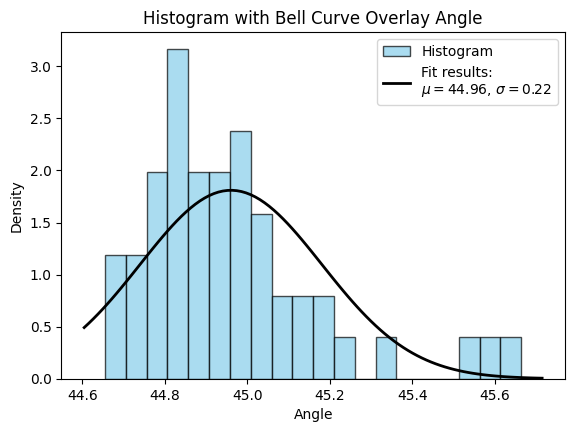

In [29]:
histData = create_histogram_bell_curve_chart(df, label)
chartData = build_chart_prompt(histData)

In [14]:
# let AI help us with the histogram
context = f'Analyzing a histogram of {label} in manufacturing.  This chart visually represents the distribution of the {label} data.'
description = f'Histograms show the frequency of data points falling within specific ranges (bins).  They help us understand the underlying distribution of the {label} data, including its central tendency, spread, and shape.  The following data represents the histogram distribution.'
question = f'Interpret the histogram of {label}. Describe the distribution characteristics (e.g., normal, skewed, bimodal). Are there any unusual patterns, such as gaps or outliers? Based on the histogram, are there any potential issues or areas for improvement related to {label} in the manufacturing process? Explain your reasoning and suggest specific actions if necessary.'

prompt = build_analysis_prompt(context, description, chartData, question)
# printMarkdown(prompt)
result = model.generate_content(prompt)
printMarkdown(result.text)


## Analyzing the Histogram of Angle

Based on the provided data and the control chart limits, we can infer the following about the Angle distribution:

**Distribution Characteristics:**

* **Central tendency:** The data appears to be centered around 45, suggesting a mean value close to 45.
* **Spread:** The data has a relatively small spread, with most values falling within a narrow range between the upper and lower control limits. 
* **Shape:**  While we don't have the exact histogram, the control chart suggests a slightly **right-skewed** distribution. This is because the data points are more concentrated towards the lower limit and taper off towards the upper limit. 

**Unusual Patterns:**

* **No major gaps or outliers:**  The data points seem to be distributed fairly evenly within the control limits, with no significant gaps or outliers that deviate greatly from the general trend.

**Potential Issues & Areas for Improvement:**

* **Slight right-skewness:** While the data is generally within the control limits, the slight right-skewness suggests that there may be a tendency for the Angle to be slightly larger than the ideal value of 45. This could potentially indicate a bias in the manufacturing process, or variations in materials or equipment. 
* **Further investigation needed:**  To better understand the cause of the skewness, we need more information about the manufacturing process and potential sources of variability. 

**Specific Actions:**

1. **Investigate the cause of skewness:** Analyze process data, machine settings, and material specifications to understand the potential root causes of the observed right-skewness.
2. **Implement corrective actions:** Based on the investigation, implement corrective measures to address the root cause of the skewness. This might involve adjustments to machine settings, process parameters, or quality control procedures.
3. **Monitor process performance:** Continuously monitor the Angle data using control charts to track the effectiveness of corrective actions and ensure the process remains in control. 

**Overall:** The histogram suggests that the Angle process is generally stable with a slight right-skewness. Further investigation is needed to understand the cause of this skewness and take appropriate corrective actions to improve process performance and reduce variability. 


In [42]:
# Example usage:
image_path = "./Curvature_control_chart.png"  
image_prompt = build_chart_image_prompt(image_path,'control chart',controlChartPrompt)

printMarkdown(image_prompt)


  Analyze the following chart control chart:

  [Image of iVBORw0KGgoAAAANSUhEUgAAAooAAAHCCAYAAABol+gQAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9hAAAPYQGoP6dpAAC4HklEQVR4nOydd3gUdf7H37M12fTeCCkQuhQhVGlKMzb8WbAinl1QEbF7KuiBnnqIp2K5o5y9N0AEgYD03mtCQigppG42m+3z+2N2ZneT3c3uZmvyeT1PHtjZ78x8d3Z25j2fyrAsy4IgCIIgCIIgWiAK9AQIgiAIgiCI4ISEIkEQBEEQBGEXEooEQRAEQRCEXUgoEgRBEARBEHYhoUgQBEEQBEHYhYQiQRAEQRAEYRcSigRBEARBEIRdSCgSBEEQBEEQdiGhSBAEQRAEQdiFhCJBEARBEARhFxKKBEEQBEEQhF1IKBIEQRAEQRB2IaFIEARBEARB2IWEIkEQBEEQBGEXEooEQRAEQRCEXUgoEgRBEARBEHYhoUgQBEEQBEHYhYQiQRAEQRAEYRcSigRBEARBEIRdSCgSBEEQBEEQdiGhSBAEQRAEQdiFhCJBEARBEARhFxKKBEEQBEEQhF1IKBIEQRAEQRB2IaFIEARBEARB2IWEIkEQBEEQBGEXEooEQRAEQRCEXUgoEgRBEARBEHYhoUgQBEEQBEHYhYQiQRAEQRAEYRcSigRBEARBEIRdSCgSBBFwSktLwTAMli9f7tXtZmdn49prr/XqNgmCIDoTJBQJIsQoLi7GQw89hNzcXISFhSE6OhqjRo3C4sWL0dzc7LP9Hjt2DK+++ipKS0t9tg9XqaysxNy5c9GrVy8oFApERERg8ODBeP3111FfXx+QOXl6fA4cOIC77roLmZmZkMvliI+Px4QJE7Bs2TIYjUbfTNZLfPnll3j33XcDPQ2CIHyIJNATIAjCdVatWoVbbrkFcrkc06dPR79+/aDT6bBlyxY8/fTTOHr0KD755BOf7PvYsWOYN28exo0bh+zsbJ/swxV2796NgoICqFQq3HXXXRg8eDAAYM+ePXjjjTewefNmrF271u/z8uT4/Oc//8HDDz+MlJQU3H333cjLy0NjYyPWr1+P++67D+Xl5XjhhRd8O/F28OWXX+LIkSOYPXt2oKdCEISPIKFIECFCSUkJbrvtNmRlZWHDhg1IS0sT3ps5cyaKioqwatWqAM7QAsuy0Gg0CA8P9+p26+vrceONN0IsFmP//v3o1auXzfv/+Mc/8Omnn3p1n22h0Wggk8ncXm/Hjh14+OGHMWLECKxevRpRUVHCe7Nnz8aePXtw5MgRr8yxqakJERERXtmWP1Cr1VAoFIGeBkEQAMASBBESPPzwwywAduvWrS6N1+v17Pz589nc3FxWJpOxWVlZ7PPPP89qNBqbcVlZWew111zD/vXXX2x+fj4rl8vZnJwcdsWKFcKYZcuWsQBa/W3cuNFmG2vWrGEHDx7MyuVydtGiRSzLsmxxcTF78803s3FxcWx4eDg7bNgwduXKlTZzKCkpYQGwy5Ytc/qZ3njjDRYA+8UXX7h0DFz5bCzLsjU1NexTTz3F9uvXj42IiGCjoqLYKVOmsAcOHLAZt3HjRhYA+9VXX7Evvvgim56ezjIMwy5atMjp8bHHlClTWIlEwp49e7bNz8Hvt+X27B23e+65h42IiGCLiorYq6++mo2MjGRvuOEGdubMmWxERATb1NTUavu33XYbm5KSwhoMBpZlWfbnn39mCwoK2LS0NFYmk7G5ubns/PnzhfdZlmXHjh3b6vNmZWWxLGs5X0pKStr8HGPHjmX79u3L7tmzhx09ejQbHh7OPvHEEyzLsqxGo2Fffvlltlu3bqxMJmO7dOnCPv30063OYYIgfAdZFAkiRPjtt9+Qm5uLkSNHujT+/vvvx4oVK3DzzTfjqaeews6dO7Fw4UIcP34cP/30k83YoqIi3Hzzzbjvvvtwzz33YOnSpZgxYwYGDx6Mvn37YsyYMXj88cfx3nvv4YUXXkDv3r0BQPgXAE6ePInbb78dDz30EB544AH07NkTlZWVGDlyJNRqNR5//HEkJCRgxYoVuP766/H999/jxhtvdOsY/PrrrwgPD8fNN9/s8jptfTYAOHPmDH7++WfccsstyMnJQWVlJT7++GOMHTsWx44dQ3p6us02X3vtNchkMsydOxdarRaTJk1q8/hYo1arsX79eowZMwZdu3Z16xi4gsFgwOTJk3HFFVfg7bffhkKhQHZ2Nj744AMhfMF6Lr/99htmzJgBsVgMAFi+fDkiIyMxZ84cREZGYsOGDXj55ZehVCrx1ltvAQBefPFFNDQ04Pz581i0aBEAIDIy0qP51tTU4Oqrr8Ztt92Gu+66CykpKTCZTLj++uuxZcsWPPjgg+jduzcOHz6MRYsW4dSpU/j555/bd5AIgnCNQCtVgiDapqGhgQXA3nDDDS6NP3DgAAuAvf/++22Wz507lwXAbtiwQViWlZXFAmA3b94sLKuqqmLlcjn71FNPCcu+++47h1Yyfhtr1qyxWT579mwWAPvXX38JyxobG9mcnBw2OzubNRqNLMu6blGMi4tjBwwY0NbHd/uzaTQaYS48JSUlrFwuZ+fPny8s4y1iubm5rFqtthnv7Pi05ODBgywAwXLWFu5aFAGwzz33nM1Yk8nEZmRksDfddJPN8m+//bbVMWr52ViWZR966CFWoVDYWPOuueYawYpojbsWRQDsRx99ZDP2s88+Y0Uikc25w7Is+9FHH7llWScIon1Q1jNBhABKpRIAbOLYnLF69WoAwJw5c2yWP/XUUwDQKpaxT58+GD16tPA6KSkJPXv2xJkzZ1yeY05ODiZPntxqHkOHDsUVV1whLIuMjMSDDz6I0tJSHDt2zOXtA9xxcPUY8Ljy2eRyOUQi7nJoNBpRU1ODyMhI9OzZE/v27Wu1zXvuuadd8Zfufp+e8Mgjj9i8ZhgGt9xyC1avXg2VSiUs/+abb5CRkWHzHVl/tsbGRlRXV2P06NFQq9U4ceKE1+cql8tx77332iz77rvv0Lt3b/Tq1QvV1dXC35VXXgkA2Lhxo9fnQRBEa0goEkQIEB0dDYC7abvC2bNnIRKJ0L17d5vlqampiI2NxdmzZ22W23N/xsXFoa6uzuU55uTk2J1Hz549Wy3nXbIt59EW0dHRLh8DHlc+m8lkwqJFi5CXlwe5XI7ExEQkJSXh0KFDaGhoaLW+vc/qDu5+n+4ikUjQpUuXVsunTZuG5uZm/PrrrwAAlUqF1atX45ZbbgHDMMK4o0eP4sYbb0RMTAyio6ORlJSEu+66CwDsHo/2kpGR0Soh6PTp0zh69CiSkpJs/nr06AEAqKqq8vo8CIJoDcUoEkQIEB0djfT0dLezYK1v/s7gY9NawrKsy/vydoazPXr16oUDBw5Ap9O5nGnsymdbsGAB/v73v+Nvf/sbXnvtNcTHx0MkEmH27NkwmUyt1m3vZ+3evTskEgkOHz7s0nhH36OjOovWFlJrhg8fjuzsbHz77be444478Ntvv6G5uRnTpk0TxtTX12Ps2LGIjo7G/Pnz0a1bN4SFhWHfvn149tln7R6P9s7X3vE0mUy47LLL8K9//cvuOpmZmW3OgyCI9kNCkSBChGuvvRaffPIJtm/fjhEjRjgdm5WVBZPJhNOnT9skVFRWVqK+vh5ZWVlu799V0dlyHidPnmy1nHdfujuP6667Dtu3b8cPP/yA22+/3e35OOL777/H+PHj8d///tdmeX19PRITE13ahjvHR6FQ4Morr8SGDRtw7ty5NkVPXFycMB9r3LXIAsCtt96KxYsXQ6lU4ptvvkF2djaGDx8uvF9YWIiamhr8+OOPGDNmjLC8pKSk1bYcfWZvzLdbt244ePAgrrrqKo/OPYIgvAO5ngkiRHjmmWcQERGB+++/H5WVla3eLy4uxuLFiwEABQUFANCqawZvnbnmmmvc3j9fh8+dzicFBQXYtWsXtm/fLixramrCJ598guzsbPTp08etOTz88MNIS0vDU089hVOnTrV6v6qqCq+//rpb2wQ4q2NL6+l3332HCxcuuLwNd4/PK6+8ApZlcffdd9vEDPLs3bsXK1asAMAJarFYjM2bN9uM+fDDD12eH8+0adOg1WqxYsUKrFmzBrfeeqvN+7wF1vp46HQ6u/uKiIiw64ru1q0bANjM12g0ulUM/tZbb8WFCxfs1sVsbm5GU1OTy9siCMJzyKJIECFCt27d8OWXX2LatGno3bu3TWeWbdu24bvvvsOMGTMAAAMGDMA999yDTz75RHAl7tq1CytWrMDUqVMxfvx4t/c/cOBAiMVivPnmm2hoaIBcLseVV16J5ORkh+s899xz+Oqrr3D11Vfj8ccfR3x8PFasWIGSkhL88MMPdt2jzoiLi8NPP/2EgoICDBw40KYzy759+/DVV1+1aW21x7XXXov58+fj3nvvxciRI3H48GF88cUXyM3NdXkb7h6fkSNH4oMPPsCjjz6KXr162XRmKSwsxK+//iqI3piYGNxyyy3497//DYZh0K1bN6xcudKjOL3LL78c3bt3x4svvgitVmvjdubnFRcXh3vuuQePP/44GIbBZ599ZjcMYfDgwfjmm28wZ84c5OfnIzIyEtdddx369u2L4cOH4/nnn0dtbS3i4+Px9ddfw2AwuDzPu+++G99++y0efvhhbNy4EaNGjYLRaMSJEyfw7bff4o8//sCQIUPc/vwEQbhJIFOuCYJwn1OnTrEPPPAAm52dzcpkMjYqKoodNWoU++9//9umdIler2fnzZvH5uTksFKplM3MzHRacLslY8eOZceOHWuz7NNPP2Vzc3NZsVhst+C2PfiC27GxsWxYWBg7dOhQjwtu81y8eJF98skn2R49erBhYWGsQqFgBw8ezP7jH/9gGxoa3P5sGo2Gfeqpp9i0tDQ2PDycHTVqFLt9+/ZW4/jyLt99953deTk6Ps7Yu3cve8cdd7Dp6emsVCpl4+Li2KuuuopdsWKFTcmeS5cusTfddBOrUCjYuLg49qGHHmKPHDnisOC2M1588UUWANu9e3e772/dupUdPnw4Gx4ezqanp7PPPPMM+8cff7T6TCqVir3jjjvY2NhYm4LbLMt97xMmTGDlcjmbkpLCvvDCC+y6descFty2h06nY9988022b9++rFwuZ+Pi4tjBgwez8+bNs/meCYLwHQzLuhGtThAEQRAEQXQaKEaRIAiCIAiCsAsJRYIgCIIgCMIuJBQJgiAIgiAIu5BQJAiCIAiCIOxCQpEgCIIgCIKwCwlFgiAIgiAIwi5UcLudmEwmXLx4EVFRUdRmiiAIgiA6CCzLorGxEenp6W43B+hIkFBsJxcvXqTm9ARBEATRQTl37hy6dOkS6GkEDBKK7SQqKgoAdyJFR0cHeDaeo9frsXbtWkyaNAlSqTTQ0+kU0DEPDHTc/Q8dc/9Dx7z9KJVKZGZmCvf5zgoJxXbCu5ujo6NDXigqFApER0fTRcVP0DEPDHTc/Q8dc/9Dx9x7dPawss7rdCcIgiAIgiCcQkKRIAiCIAiCsAsJRYIgCIIgCMIuFKPoJ4xGI/R6faCn4RC9Xg+JRAKNRgOj0Rjo6XQKOsIxl0qlEIvFgZ4GQRAE4SNIKPoYlmVRUVGB+vr6QE/FKSzLIjU1FefOnev0gbv+oqMc89jYWKSmpob0ZyAIgiDsQ0LRx/AiMTk5GQqFImhvpiaTCSqVCpGRkZ26sKg/CfVjzrIs1Go1qqqqAABpaWkBnhFBEAThbUgo+hCj0SiIxISEhEBPxykmkwk6nQ5hYWEhKVpCkY5wzMPDwwEAVVVVSE5OJjc0QRBEByM0704hAh+TqFAoAjwTgvAd/PkdzDG4BEEQhGeQUPQDwepuJghvQOc3QRBEx4WEIkEQBEEQBGEXEooEQRAEQRCEXSiZxVs0NQEtA/m1WoBlbZc5q5fHMIB1UoO3xgK2c7M3lmUBk4n7M2+3oqIC/3j9daxavRoXLlxAcnIyBg4YgNmPP46rrrqq9XZNptaf19Ec2jl2xt/+hvr6evz844/cfHn3Z1vbDcaxzsb7Yw78d+8I63PN3lijkVumVnPfG99X1mgENBrH25VKAZnM/bEmE9Dc7PlYvR5ijYb7zYaHA3K55bOp1Y63K5G4PlYsBsLCLK+bmrwzViTi5uzJWLXa8TnBMIB1LLU7Y5ubnZ8/ERG2Y3U618ZqNM6va+6MVSgs57tWCxgM3hkbHm75beh0gLM4XXfGhoVZroHujNXrLcfX+jznf5NyOXcetxxrD+uxBgN3LBwhk1n24c7YYL1G8Dj7fXUiSCh6i/T01suysoAVK4DcXMuygwcdX1SjooCePS2vDx92fJFSKIA+fSyvjx51/KMPCwP69bO8Pn681Q9OBCAWACuTAf37o7S0FKNGjUJseDjeevhhXNatG/QGA/7YsQMzH3wQJ77/nruIDBxo2cjp00Bjo/05iERgBw2C0WiERCIBiouBhgb7YwFgyBDL/0tKgLo62/dragCVCti/Hxg0yHKhPHuWe88RAwZYLlLnzsFYUQGGYexnHV92mUUYXLgAVFY63m7fvpabckUFcPGi47G9ews3OXlDA0Rnzjge27Mnd14AQHU1UFbmeGz37kBsLPf/2lqgtNTx2NxcID6e+39dHeBsDtnZQGIi9/+GBqCoqPWY6mrgmmuAp58GZs7klv31FzB+vOPt/vOf3HgA2LcPGDrU8dhXXgFefZX7//HjtudzS+bOBd56i/t/WRmQk2PzthTAtfyLRx8FPvjA8hmSkx1v9557gOXLuf+r1UBkpOOxN98MfPed5bWzsQUFwKpVltfJyY5F6NixQGGh5XV2NjdvewwZAuzebXndpw/3+7BHnz7cNYQnPx84dsz+2Kws23NrzBhgzx77YxMTgUuXhJfi664DNm+2P1ahsL0x33QTsHq1/bGArZC9+27g++8dj1WpLMLyoYe467IjqqqApCTu/3PmAB9+6HhsSQn3HQDAiy8Cb7/teOyRI9x1AgAWLADmzXM8dtcu7jsAgMWLgWeecTx240Zg3Dju/598AsyaBaDFec6zciX3OwWAL74A7r3X8Xa//Ra45Rbu/z/9BNx6q+Oxy5YBM2Zw///jD+DaVnu28P77QX+NIGwh1zNhl0cffRQMw2DX11/jpiuvRI+sLPTt1g1z7rwTO5YtQ+nFi2AGDcKBAweEdeqVSjD5+SjcuxcAULh3L5j8fPy+dSsG33kn5HI5li5dCoZhcKK42GZ/i778Et2mTgXAlRW67777kJOTg/DwcPScOBGLv/pKGPvqJ59gxapV+GXTJjD5+WAkEhQWFqKwsBBMbi7qrcTqgZMnweTno9Qs3Jb/73+IjY3Fr7/+ij4TJkA+ahTKKiqg1ekw9913kVFQgIjRozFsxgwUbtrko6NLEARBEKEBw7LO/FNEWyiVSsTExKDh4kVER0fbvKfRalFSUYGc3FyEmV1LrMGAZr0DF4mPXc/hUjGXoWpnrIlloVQqER0djXqlEomJifjHP/6B55991q4LqrS0FDndu2P//v0YaLYq1tfWIi4hARv//BPjxo1DYWEhxk+YgP79++PtN99Ebl4e4uLiMHnyZEyZPBmvWT1RDxk2DFdPnozX5s+HXq/H6wsX4rrrrkNCQgK2bdmCBx9+GMv++1/cesstUKlUuO+BB6BUKrHsv/8FRCLEJyRg27ZtGD9+POqqqxFrtqwdOHAAg4YMQUlREbKzs7H8f//Dgw89hPz8fLz15ptIiI9HZmYmnnjySRw7dgxvLFiA9PR0/PTzz3jp5Zdx+PBh5OXl+cTtazKZoKyvR3R0NESOModDwPWs0WhQUlqKnLQ0hEVFBb1bSa/X448//sDkyZMhJdczh49dz3q9HqtXr0bB+PGQOqu1Sa5nDi+4nm3Oc3I9ezRWqVQiJj0dDQ0Nre7vnYmQcT0vXLgQP/74I06cOIHw8HCMHDkSb775Jnpau2rtUF9fjxdffBE//vgjamtrkZWVhXfffRcFBQUAgFdffRXzWrgAevbsiRMnTrg3wYgI2wsXwP14WwiAZhPQZ96f7m3bSxybPxkKmaR1LCVgiU0UiVBUVASWZdGrVy9bMWqNvW3wY8Viyx+A+fPnY+KUKcKwO++8E++//z5ee/11AMCpU6ewd+9efP7554BYDKlYbPOd5OTkYPvOnfj2++9x6223ITImBuEKBbQ6HVIzMuzPjZ+f9b/m70Ov1+PDDz/EgAEDAABlZWVYtnw5ysrKkG4OIZj7zDNYs3Ytli1bhgULFjg+DvZwdyz/5+3tugrD2P8+XR0rFnP7UygsNwB+ecvfhCPcGSsStW+sXg9jWBi33Hq+DOP6dt0ZCwTHWHfquboz1lqMujLW+pg7w1o8e3OsXG4R/N4cK5NZxEegxkqlluPr6Dy3N7YtJBKLaPTm2GC9RvC0ZYDpJISMUNy0aRNmzpyJ/Px8GAwGvPDCC5g0aRKOHTuGCAdfsk6nw8SJE5GcnIzvv/8eGRkZOHv2rGBt4unbty/+/NMi3iSunuQdFG8bmYdYxxsCuO222zB37lzs2LEDw4cPxxdffIHLL7+cE6ZmPvjgAyxduhRlZWVobm6GTqcTLJftRSaToX///sLrw4cPw2g0okePHjbjtFpt0HfUIQiCIAhfEjKKaM2aNTavly9fjuTkZOzduxdjxoyxu87SpUtRW1uLbdu2Cab3bD7w2AqJRILU1FSvz9ke4VIxjs2f7Jd92du3K+Tl5XFxhE6sqnzyh7WodNSZo6WQT01NxZVXXokvv/wSw4cPx5dffolHHnlEeP/rr7/G3Llz8c4772DEiBGIiorCW2+9hZ07dzqdt6tzCg8PtykSrVKpIBaLsXfv3lYt6CKdJSEQBEEQRAcnZIRiSxrMGbPxfOamHX799VeMGDECM2fOxC+//IKkpCTccccdePbZZ20EwenTp5Geno6wsDCMGDECCxcuRNeuXe1uU6vVQmsVf6FUKgFwgqSlKNHr9WBZFiaTCSarGJ4wSWByiFiWdWgt5JezLIvY2FhMmjQJH3zwAWbNmtVK6NXX1wuWtgsXLggu3H379gGA8Hn5z9zy8wPA7bffjueeew7Tpk3DmTNncOuttwpjtmzZgpEjR+Lhhx8Wxhebk1/4MVKpFAaDwWa71nOKiYlpc048AwYMgNFoREVFBUaPHt3q2LScu7ewPua+2oc/MJlMYFkWer0+JHo9879TajnoP+iY+x865u2Hjh1HSApFk8mE2bNnY9SoUejnJAX+zJkz2LBhA+68806sXr0aRUVFePTRR6HX6/HKK68AAIYNG4bly5ejZ8+eKC8vx7x58zB69GgcOXIEUXxZEisWLlzYKqYRANauXduqpzNvqVSpVNA5CxoOIhrNGcNvvPEGpkyZgqFDh+L5559H3759YTAYUFhYiKVLl2Lnzp3Iz8/HggULkJSUhOrqauGYqtVqKJVKqM3B/o2Nja3Kz0yYMAGNjY14+OGHMXr0aERGRgqiOzMzE//73//w008/ISsrC9988w127dqFrKwsYUxqairWrFmDvXv3Ij4+HtHR0UhOTkZGRgb+/ve/46WXXkJRURHeeecdAJzVUKlUQqPRgDUn7vCkpqbilltuwfTp0/H666+jf//+qK6uxqZNm9C3b19MnuxbC3Cjo5JCIYJOp0NzczM2b94Mg7PA/yBj3bp1gZ5Cp4OOuf+hY+45amcJa52IkMx6fuSRR/D7779jy5Yt6NKli8NxPXr04DIyS0oES8e//vUvvPXWWygvL7e7Tn19PbKysvCvf/0L9913X6v37VkUMzMzUV1d3TrrWaPBuXPnkJ2dLWQ9Byssy6KxsRFRUVGCW7a8vBwLFizAqlWrUF5ejqSkJFx++eWYPXs2xo0bh+PHj+OBBx7AgQMH0LNnT0Fcrl+/Xsh6vuqqq1BTU9MqLhTgYhW/++47/Oc//8G9VvW8tFotHnnkEfz8889gGAa33XYbYmJisGbNGsFCeOnSJdx1113YsWMHVCqVsM+tW7di5syZOH36NPLz8zFr1ixMmzYNxcXFXNbz8uWYM2cOamtrbeai1+vxj3/8A5999hkuXLiAxMREDBs2DK+++iouu+wyvx3zUESj0aC0tBSZmZlBf54D3He9bt06TJw40ZINSvgUOub+h455+1GaK4B09qznkBOKs2bNwi+//ILNmzcjp40imWPHjoVUKrVJVPn9999RUFAArVYLmYNMsvz8fEyYMAELFy5scz5CeRw7JxIvUnNycoL+BmoymYTyOHaLTxNep6Mc81A6zwFYSrUUFNAN1E/QMfc/dMzbj7P7e2ciZO5OLMti1qxZ+Omnn7Bhw4Y2RSIAjBo1CkVFRTbxX6dOnUJaWppDkahSqVBcXIy0tDSvzZ0gCIIgCCIUCRmhOHPmTHz++ef48ssvERUVhYqKClRUVKDZqlDm9OnT8fzzzwuvH3nkEdTW1uKJJ57AqVOnsGrVKixYsAAz+fZBAObOnYtNmzahtLQU27Ztw4033gixWIzbb7/dr5+PIAiCIAgi2AiZZJYlS5YAAMbxPS3NLFu2DDPMPSbLyspsXHiZmZn4448/8OSTT6J///7IyMjAE088gWeffVYYc/78edx+++2oqalBUlISrrjiCuzYsQNJfK9PgiAIgiCITkrICEVXQikLCwtbLRsxYgR27NjhcJ2vv/66PdMiCIIgCILosISM65kgCIIgCILwLyQUCYIgCIIgCLuQUCQIgiAIgiDsQkKRIAiCIAiCsAsJRYIIEsaNG4fZs2cHbH0AWL58ud0uOgRBEETnhIQiYRdHoiNUhMQPP/yAcePGISYmBpGRkejfvz/mz5/fqnVfeygsLATDMKivr/faNp3R1rH/8ccf8dprr7VrH9OmTcOpU6eE16+++ioGDhzYrm0SBEEQoQsJRSIkMRqNNh13rHnxxRcxbdo05Ofn4/fff8eRI0fwzjvv4ODBg/jss8/8PFNAp9P5ZT/x8fGIiopq1zbCw8ORnJzspRkRBEEQoQ4JRaJdzJgxA1OnTsW8efOQlJSE6OhoPPzwwzbiaNy4cZg1axZmzZqFmJgYJCYm4u9//7tNbUytVou5c+ciIyMDERERGDZsmE1dTN6a9uuvv6JPnz6Qy+UoKytrNZ9du3ZhwYIFeOedd/DWW29h5MiRyM7OxsSJE/HDDz/gnnvuEcYuWbIE3bp1g0wmQ8+ePVuJSIZh8J///Ac33ngjFAoF8vLy8OuvvwIASktLMX78eABAXFwcGIYRCr/zn3f27NlITEzE5MmTAQCbNm3C0KFDIZfLkZaWhueffx4Gg6F9X4AVLa3A2dnZeP311zF9+nRERkYiKysLv/76Ky5duoQbbrhBsLTu2bNHWMfaarl8+XLMmzcPBw8eBMMwYBgGy5cv99p8CYIgiOCHhCLRbtavX4/jx4+jsLAQX331FX788UfMmzfPZsyKFSsgkUiwa9cuLF68GP/617/wn//8R3h/1qxZ2L59O77++mscOnQIt9xyC6ZMmYLTp08LY9RqNd5880385z//wdGjR+1avr744gtERkbi0UcftTtXXgT99NNPeOKJJ/DUU0/hyJEjeOihh3Dvvfdi48aNNuPnzZuHW2+9FYcOHUJBQQHuvPNO1NbWIjMzEz/88AMA4OTJkygvL8fixYttPq9MJsPWrVvx0Ucf4cKFCygoKEB+fj4OHjyIJUuWYOnSpXj77bfdO9husmjRIowaNQr79+/HNddcg7vvvhvTp0/HXXfdhX379qFbt26YPn263YL206ZNw1NPPYW+ffuivLwc5eXlmDZtmk/nSxAEQQQXIdOZpcPR1OT4PbEYCAtzbaxIBISHtz02IsK9+bmBTCbD0qVLoVAo0LdvX8yfPx9PP/00XnvtNaGlYmZmJhYtWgSGYdCzZ08cPnwYixYtwgMPPICysjIsW7YMZWVlSE9PB8D14F6zZg2WLVuGBQsWAAD0ej0+/PBDDBgwwOFcTp8+jdzcXEilUqdzfvvttzFjxgxBUM6ZMwc7duzA22+/LVgKAc5iyvf9XrBgAd577z3s2rULU6ZMQXx8PAAgOTm5VexgXl4e/vnPfwqvX3zxRWRmZuL9998HwzDo1asXLly4gOeeew6vv/66TetJb1JQUICHHnoIAPDyyy9jyZIlyM/Pxy233AIAePbZZzFixAhUVlYiNTXVZt3w8HBERkZCIpG0eo8gCILoHJBFMVBERjr+u+km27HJyY7HXn217djsbPvjfMiAAQOgUCiE1yNGjIBKpcK5c+eEZcOHDwfDMDZjTp8+DaPRiMOHD8NoNKJHjx6IjIwU/jZt2oTi4mJhHZlMhv79+zudiyutHgHg+PHjGDVqlM2yUaNG4fjx4zbLrPcXERGB6OhoVFVVtbn9wYMHt9rfiBEjbI7ByJEjoVKpcP78eZfm7AnW809JSQEAXHbZZa2WufKZCIIgiM4HWRQJu0RHR6OhoaHV8vr6esTExHh1XyqVCmKxGHv37oVYLLZ5L9JK5IaHh9sILXv06NEDW7ZsgV6vb9Oq6Aott8EwjMMkGmsifGjBdQfr+fPHzt4yVz4TQRAE0fkgi2KgUKkc/5lj3wSqqhyP/f1327GlpfbHuUnPnj2xb9++Vsv37duHHj162Cw7ePAgmpubhdc7duxAZGQkMjMzhWU7d+60WWfHjh3Iy8uDWCzGoEGDYDQaUVVVhe7du9v8uevyvOOOO6BSqfDhhx/afZ8vZdO7d29s3brV5r2tW7eiT58+Lu9LJpMB4DKw26J3797Yvn27jcVz27ZtiIqKQpcuXVzep7+RyWQufT6CIAiiY0IWxUDhjsXJV2Od8Mgjj+D999/H448/jvvvvx9yuRyrVq3CV199hd9++81mrE6nw3333YeXXnoJpaWleOWVVzBr1iybuLuysjLMmTMHDz30EPbt24d///vfeOeddwBwVsA777wT06dPxzvvvINBgwbh0qVLWL9+Pfr3749rrrnG5XkPGzYMzzzzDJ566ilcuHABN954I9LT01FUVISPPvoIV1xxBZ544gk8/fTTuPXWWzFo0CBMmDABv/32G3788Uf8+eefLu8rKysLDMNg5cqVKCgoEGL67PHoo4/i3XffxWOPPYZZs2bh5MmTePXVV/Hoo4+6FZ9oNBpx4MABm2VyuRy9e/d2eRvukJ2djZKSEhw4cABdunRBVFQU5HK5T/ZFEARBBB8kFAm75ObmYvPmzXjxxRcxYcIE6HQ69OrVC9999x2mTJliM/aqq65CXl4exowZA61Wi9tvvx2vvvqqzZjp06ejubkZQ4cOhVgsxhNPPIEHH3xQeH/ZsmV4/fXXBYGXmJiI4cOH49prr3V77m+++SYGDx6MDz74AB999BFMJhO6deuGm2++WSiPM3XqVCxevBhvv/02nnjiCeTk5GDZsmUYN26cy/vJyMjAvHnz8Nxzz+Hee+/F9OnTHZaPycjIwOrVq/H0009jwIABiI+Px9/+9jfMnTvXrc+mUqkwaNAgm2XdunVDUVGRW9txlZtuugk//vgjxo8fj/r6eixbtkwoA0QQBEF0fBjW1eh/wi5KpRIxMTFoaGhAdHS0zXsajQYlJSXIyclBmHUWcxBiMpmgVCoRHR3tloVrxowZqK+vx88//+xwzLhx4zBw4EC8++677Z9oB8LTYx5shNJ5DnDZ86tXr0ZBQYFX4liJtqFj7n/omLcfZ/f3zkTo3p0IgiAIgiAIn0JCkSAIgiAIgrALxSgS7cKVlm7WrfgIgiAIgggdyKJIEARBEARB2IWEIkEQBEEQBGEXEooEQRAEQRCEXUgoEgRBEARBEHYhoUgQBEEQBEHYhYQiQRAEQRAEYRcSigQRBBQWFoJhGNTX1wdkfZ7s7GzqoEMQBEEIkFAk7DJjxgxMnTo10NPwiIqKCjz22GPIzc2FXC5HZmYmrrvuOqxfv96r+xk3bhxmz57t1W06w5mIGzlyJMrLyxETE9OufezevdumBzfDME7bMxIEQRAdGxKKREii0+nsLi8tLcXgwYOxYcMGvPXWWzh8+DDWrFmD8ePHY+bMmX6eJcCyLAwGg8/3I5PJkJqaCoZh2rWdpKQkKBQKL82KIAiiNTvP1OBvy3ejrEYd6KkQLkBCkfCITZs2YejQoZDL5UhLS8Nzzz0nCKKVK1ciNjYWRqMRAHDgwAEwDIPnnntOWP/+++/HXXfdJbzesmULRo8ejfDwcGRmZuLxxx9HU1OT8H52djZee+01TJ8+HdHR0TZWL2seffRRMAyDXbt24aabbkKPHj3Qt29fzJkzBzt27BDGlZWV4YYbbkBkZCSio6Nx6623orKyUnj/1VdfxcCBA/HZZ58hOzsbMTExuO2229DY2AiAs7hu2rQJixcvBsMwYBgGpaWlggv4999/x+DBgyGXy7FlyxZotVo8/vjjSE5ORlhYGK644grs3r3bC98ER0vX8/LlyxEbG4uVK1eiZ8+eUCgUuPnmm6FWq7FixQpkZ2cjLi4Ojz/+uPA98ceZt1pmZ2cDAG688UYwDCO8JgiCaA+f7TiLDSeq8PuR8kBPhXABEoqE21y4cAEFBQXIz8/HwYMHsWTJEvz3v//F66+/DgAYPXo0GhsbsX//fgCcqExMTLRp5bdp0yaMGzcOAFBcXIwpU6bgpptuwqFDh/DNN99gy5YtmDVrls1+3377bQwYMAD79+/H3//+91bzqq2txZo1azBz5kxERES0ej82NhYAYDKZcMMNN6C2thabNm3CunXrcObMGUybNs1mfHFxMX7++WesXLkSK1euxKZNm/DGG28AABYvXowRI0bggQceQHl5OcrLy5GZmSms+9xzz+GNN97A8ePH0b9/fzzzzDP44YcfsGLFCuzbtw/du3fH1Vdfjbq6OvcOvhuo1Wq89957+Prrr7FmzRoUFhbixhtvxOrVq7F69Wp89tln+Pjjj/H999/bXZ8XssuWLUN5eblXhS1BEJ2XapUWAKDS+t7bQrQf6vUcIJp0TQ7fE4vECJOEuTRWxIgQLg1vc2yErLVw8pQPP/wQmZmZeP/998EwDHr16oWLFy/i2Wefxcsvv4yYmBgMHDgQhYWFGDJkCAoLC/Hkk09i3rx5UKlUaGhoQFFREcaOHQsAWLhwIe68804h3i8vLw/vvfcexo4diyVLliAsjDsWV155JZ566imH8yoqKgLLsujVq5fT+a9fvx6HDx9GSUmJIO7+97//oW/fvti9ezfy8/MBcIJy+fLliIqKAgDcfffdWL9+Pf7xj38gJiYGMpkMCoUCqamprfYxf/58TJw4EQDQ1NSEJUuWYPny5bj66qsBAJ9++inWrVuHzz77DC+99JKrh94t9Ho9lixZgm7dugEAbr75Znz22WeorKxEZGQk+vTpg/Hjx2Pjxo2tRDLAuaEBTmDb+4wEQRCeUNvEhQ41aY1tjCSCARKKASJyYaTD9wryCrDqjlXC6+S3k6HW24/lGJs1FoUzCoXX2YuzUa2ubjWOfYX1fLItOH78OEaMGGETDzdq1CioVCqcP38eXbt2xdixY1FYWIinnnoKf/31FxYuXIhvv/0WW7ZsQW1tLdLT05GXlwcAOHjwIA4dOoQvvvjCMl+WhclkQklJCXr37g0AGDJkiNN5saxrn/H48ePIzMy0sQD26dMHsbGxOH78uCAUs7OzBZEIAGlpaaiqqnJpH9ZzLS4uhl6vx6hRo4RlUqkU+fn5OHXqlEvb8wSFQiGIRABISUlBdnY2IiMjbZa5+pkIgiC8QY2KF4pkUQwFSCgSPmHcuHFYunQpDh48CKlUil69emHcuHEoLCxEXV2dYE0EAJVKhYceegiPP/54q+107dpV+L89d7I1eXl5YBgGJ06c8MpnkEqlNq8ZhoHJZHJp3bbm6g/szb89n4kgCKK9GE0s6tRmoagjoRgKkFAMEKrnVQ7fE4vENq+r5jq2+IgY2zDT0idK2zUvV+jduzd++OEHsCwrWBW3bt2KqKgodOnSBYAlTnHRokWCKBw3bhzeeOMN1NXV2biQL7/8chw7dgzdu3dv17zi4+MxefJkfPDBB3j88cdbibX6+nrExsaid+/eOHfuHM6dOydYFY8dO4b6+nr06dPH5f3JZDKbRBBHdOvWDTKZDFu3bkVWVhYAzi28Z88ePPTQQ258Qv8jlUpd+owEQRCuUK/WwWR2/pBFMTQgoRgg3IkZ9NXYtmhoaMCBAwdsliUkJODRRx/Fu+++i8ceewyzZs3CyZMn8corr2DOnDkQiTjhGhcXh/79++OLL77A+++/DwAYM2YMbr31Vuj1ehuL4rPPPovhw4dj1qxZuP/++xEREYFjx45h3bp1wrqu8sEHH2DUqFEYOnQo5s+fj/79+8NgMGDdunVYsmQJjh8/jgkTJuCyyy7DnXfeiXfffRcGgwGPPvooxo4d26Z725rs7Gzs3LkTpaWliIyMRHx8vN1xEREReOSRR/D0008jPj4eXbt2xT//+U+o1Wrcfffdbn2+CxcutPpOePHpC7Kzs7F+/XqMGjUKcrkccXFxPtsXQRAdn5omS2mzJh09hIYClPVMOKSwsBCDBg2y+Zs3bx4yMjKwevVq7Nq1CwMGDMDDDz+M++67r1VSxtixY2E0GoXs5vj4ePTp0wepqano2bOnMK5///7YtGkTTp06hdGjR2PQoEF4+eWXkZ6e7vacc3NzsW/fPowfPx5PPfUU+vXrh4kTJ2L9+vVYsmQJAM7d+ssvvyAuLg5jxozBhAkTkJubi2+++catfc2dOxdisRh9+vRBUlISysrKHI594403cNNNN+Huu+/G5ZdfjqKiIvz+++9CJrarvP32262+k1WrVrW9ooe88847WLduHTIzMzFo0CCf7YcgiM4BH58IAGpyPYcEDOtqBgBhF6VSiZiYGDQ0NCA6OtrmPY1Gg5KSEuTk5AiZu8GKyWSCUqlEdHS0YBUkfEtHOeahdJ4DnNt/9erVKCgoaBWzSfgGOub+J1iP+cpDFzHrS650Wk5iBDbOHRfYCTnB2f29MxG6dyeCIAiCIEKKWmvXM8UohgQhIxQXLlyI/Px8REVFITk5GVOnTsXJkyfbXK++vh4zZ85EWloa5HI5evTogdWrV9uM+eCDD5CdnY2wsDAMGzYMu3bt8tXHIAiCIIhOS7WN65liFEOBkBGKmzZtwsyZM7Fjxw6sW7cOer0ekyZNsmnz1hKdToeJEyeitLQU33//PU6ePIlPP/0UGRkZwphvvvkGc+bMwSuvvIJ9+/ZhwIABmDx5MtWWIwiCIAgvU9ukFf7fpDO4XP+WCBwhk/W8Zs0am9fLly9HcnIy9u7dizFjxthdZ+nSpaitrcW2bduEGI2W/Wr/9a9/4YEHHsC9994LAPjoo4+watUqLF261KY3MUEQBEEQ7cM6mYVlgWa9EQpZyEiRTknIWBRb0tDQAAAOS5IAwK+//ooRI0Zg5syZSElJQb9+/bBgwQKhLpxOp8PevXsxYcIEYR2RSIQJEyZg+/btvv0ABEEQBNHJsBaKAPV7DgVCUsabTCbMnj0bo0aNQr9+/RyOO3PmDDZs2IA777wTq1evRlFRER599FHo9Xq88sorqK6uhtFoREpKis16KSkpDrt7aLVaaLUW07lSqQTAZZjp9XqbsQYDZ1Y3Go1B3/2CN//zrfMI39NRjrnRaATLsjAYDK1+A8EIP8dQmGtHgY65/wnWY16t0tq8VjZpERcmdjA6sATbsQsUISkUZ86ciSNHjmDLli1Ox5lMJiQnJ+OTTz6BWCzG4MGDceHCBbz11lt45ZVXPNr3woULMW/evFbL165dC4VCYbOMYRikpaWhtrbWpmdwMNPY2BjoKXQ6Qv2YNzY2oqmpCRs2bAipeKN169YFegqdDjrm/ifYjnlFvRgAI7z+Y0MhugS+46ld1Gp1oKcQFIScUJw1axZWrlyJzZs3C+3iHJGWlgapVAqx2PK00rt3b1RUVECn0yExMRFisRiVlZU261VWViI1NdXuNp9//nnMmTNHeK1UKpGZmYlJkybZrbNUWVkJpVKJsLAwKBQKoeVdsMGyLJqamhARERG0c+xohPoxZ1kWarUajY2NSEtLw8CBAwM9JZfQ6/VYt24dJk6cGFT15ToydMz9TzAec4PRhCe2/wkAiA6TQKkxYFD+CORnB2fHJ95j2NkJGaHIsiwee+wx/PTTTygsLEROTk6b64waNQpffvklTCaTUND41KlTSEtLg0wmAwAMHjwY69evx9SpUwFwVsj169dj1qxZdrcpl8shl8tbLZdKpXZ/jBkZGRCLxaiurnb1owYElmXR3NyM8PDwkBQtoUhHOeZxcXFITU0Nuc/g6DdL+A465v4nmI55nUYDAGAYICNOAWW5EloTgmZ+LQnWefmbkBGKM2fOxJdffolffvkFUVFRqKioAADExMQgPDwcADB9+nRkZGRg4cKFAIBHHnkE77//Pp544gk89thjOH36NBYsWIDHH39c2O6cOXNwzz33YMiQIRg6dCjeffddNDU1CVnQ7YV3PycnJwd1vINer8fmzZsxZswY+nH4iY5wzFta7AmCCB5YFnj4i/1o1Brx+X3DIJMENn+VL7Ydr5AhOoyTH1R0O/gJGaHI9+nl+wbzLFu2DDNmzAAAlJWV2bRCy8zMxB9//IEnn3wS/fv3R0ZGBp544gk8++yzwphp06bh0qVLePnll1FRUYGBAwdizZo1rRJc2otYLA7qG6pYLIbBYEBYWFjIipZQg445QRC+RGcC1p+4BADYeLIKk/vaD6nyF3zGc3yEDBFyTn6otVR0O9gJGaHoSpB8YWFhq2UjRozAjh07nK43a9Ysh65mgiAIgghFmq2Mdd/vPR94oWi2KCZEyqCQcYaTJh1ZFIOdkK2jSBAEQRCEY9RWxrqNJ6palabxNzXm/SdEyBEpJ9dzqEBCkSAIgiA6INYWRYOJxc/7LwRuMrC4njmLolkoUr/noIeEIkEQBEF0QJqNtpUIvt97PqC1TnnXMxejaHY9k0Ux6CGhSBAEQRAdEN6i2L9LDGRiEU5UNOLoxcDVBhRcz5FyIZmliZJZgh4SigRBEATRAeGFYmacAhP7cpU8vt97PmDz4cvjJEbIEGFOZlFTMkvQQ0KRIAiCIDogzWZjXXS4BDcP5jqZ/XLgAnSGwPSWt3U9cxZFFbmegx4SigRBEATRAWk2cDGK0WFSjO6eiOQoOerUemw4URWQ+Vi7nvlkFjUlswQ9JBQJgiAIogNisShKIRGLcOPlGQAC437WGUxQajjrYQIls4QUJBQJgiAIogPCxyjy7fJuMbufN56swqVG/9ZU5OMTxSIGMeFSSzILxSgGPSQUCYIgCKIDYm1RBIDuyVEYmBkLo4nFLwf8W1OxpokTpnEKGUQiBhEyauEXKpBQJAiCIIgOiHWMIg+f1OLvmop8se3ESBkACK5nSmYJfkgoEgRBEEQHRHA9h0uEZdf1T4dM4v+airVWfZ4BCBZFrcEEgzEwWdiEa5BQJAiCIIgOiOB6trIoxiikmNTH/zUV+T7T8RFyAIDCbFEEALWe3M/BDAlFgiAIguhgsCxrZVGU2rzHu59/PnABWoN/RJpgUYzgLIpyiRhSMecap8zn4IaEIkEQBEF0MNQ6I0xoHaMIAKPzkpASLUe9Wo+NfqqpyMco8kIRgFBLkdr4BTckFAmCIAiig8HXLJSKGYRJbW/1YhGDGwdZklr8QY0QoygXlkUK/Z7JohjMkFAkCIIgiA5Go0YPAIgKk4BhmFbv3zyYK7698eQlv9RU5MvjxNtYFM1Ft6mWYlBDQpEgCIIgOhi8RbGl25nH3zUVW5bHAQCFnGophgIkFAmCCAlqm3T45cAFaChDkghCztepMWPZLvx5rDLQUwFgLRQlDsfwSS3f7fF9TcVau65nsiiGAiQUCYIICd764ySe+PoAvttzLtBTIYhWvLP2FApPXsILPx32WyaxMxqbedezfYsiYKmpeLKyEUcu+K6mokZvFAprx1MyS8hBQpEIes7WNFFBVgL7y+oAAMfKGwM8E4Kw5XydGr8evAgAqGrU4oe9/m2PZw9XLIoxCikm900FAHy/13cPYLw1USpmbOYTwccoUjJLUENCkQhqPttxFmPfKsTHm88EeipEANEajCiqUgEASqpVAZ4NQdjy3y0lMJpYITnj483FAX+4FYRiuGOhCFjcz78cvOgzSygfnxgfIbNJrIngs57J9RzUkFAkgpYmrQGL1p0CAOwqqQ3wbIhAcrpSBYOJi6EqrVYHeDYEYaGuSYevd3HWuEXTBiJOIcXZGjVWHS4P6LwsWc+OXc8AcEX3RKGm4qaTl3wyFz7jOSFCbrOcF4pqHbmegxkSikTQsnxbqeCyKKslcdCZOWbVk7ZCqUEz3ViIIOF/28+iWW9E3/RoTOqTgntH5QAAlhQW+zxBxBmuuJ4BrqbiyG6JAICS6iafzEUotm2V8QxY+j2ryPUc1JBQJIKShmY9Pt5ULLw+X6eG0RS4iy4RWI6V2wbal9b45oZGEO7QrDNixfZSAMBDY7uBYRjcMyIbETIxTlQ0YoOfup7YQ2lOZmlLKAJAnIITcLVqnU/mYrEothCK5qxnNQnFoIaEIhGU/HdLCZQaA7onR0ImFkFvZFHe0BzoaREBwtqiCPjO8kEQ7vDtnnOobdIhMz4cBf24pJAYhRR3Dc8CAHywsShgVsVGs0WxLdczAMRHcGPqm/Q+mYu9riyAJetZRVnPQQ0JRSLoqGvSYemWEgDAnIk90CUuHABQVkPu586IycQKFsU+adEAOqZQVGr0+HHfeXLDhQgGowmf/sUl2T04OhcSseV2et8VOZBJRNhXVo+dAYqvdjWZBQBifW1RtEpmsUawKFIyS1BDQpEIOj7efAYqrQF90qIxpW8quiYoAABnKU6xU3K+rhkqrQEysQgTeicDAEo7oFD8ZNMZzPn2IJaZH5KI4GbV4XKcr2tGQoQMtwzJtHkvOToMt5iziT8sLLa3us9RanjXc9sWRd71XO8jocjHmic6iFFsopjjoIaEIhFUXGrUYsW2UgCcNVEkYpAVzwlFSmjpnBwrbwAA9EiNRPeUKAAd06J49CL3OUvJch70sCyLjzZx1sQZI7MRJhW3GvPQmG4QixhsPnUJh883+HuKVq5nF2IUza7nOrWPXM8qvs+z/axnqqMY3JBQJIKKJYXFaNYbMSAzFleZrUddEyIAkOu5s8LHJ/ZNi0FuIncudMRkluJL3GeqatQEeCZEW2w6dQnHy5VQyMS4e0SW3TFdExS4rn8aAGDJpiJ/Tg8sy7qc9QxYLIp1Tb5KZnGQ9UzJLCEBCUUiaKho0ODznWcBAE9N7CEUZu0az7ueO544INrmqFko9kmPRrZZKFardIJrrSOg0Rtxvo57ELrUqA3wbIi2+MhckeH2oV2F+D57PDKuOwDg9yMVQsF4f6DWGYUqEW65npv1Pkm+EcrjtIhRVJDrOSQgoUgEDe9vPA2dwYSh2fEYnZcoLM8yxyiSRbFzIiSypEcjUi5BojlzsiPFKZ6tUYOv/lRFQjGoOXCuHjvO1EIiYnDfFTlOx/ZMjcKE3ilgWdiU+/I1/EOUmGERJm37Nh+r4MSk0WSxRHoLtc6AZj0nBFtmPUdauZ4DWXOScA4JRSIoOFerxje7ue4Gcyb1sGnzlBnHCUWlxuCzYGsiOKlt0qG8gXPF9krl4hN593NHilMsvmSxNtU26aAzUG/zYOUjc3LKDQMzkB4b3ub4R8d3AwD8tP8CLtT7p8SXspkTe+Fi2FxLHREmFQvtB73tfuatiXKJSOjtzKMwu54NJha6ALc8JBxDQpEICv694TT0RhZXdE/E8NwEm/fCZWIkR3FPomfJqtipOG62JmYlKIR6cNmJ3INDR2rld+aSrVuyWkVWxWCk+JIKfxyrAAA8PDbXpXUu7xqHEbkJMJhYfOqnnvW8RdGFyjgCQpyilx/GhfjEFn2eAUvWMwA0US3FoIWEIhFwSqqb8MO+CwA4a6I9sqhETqeET2Th6ycCEOIUS6r9F/Pla/hEFh5yPwcn//nrDFgWmNA7GXnmDHxXmDmei1X8eneZkAHsS/iuLOGtk7Edwmc+13s587mW78rSwu0McO0Dedc4ZT4HLyQUiYCz+M9TMJpYXNkrGZd3jbM7pms8Jw7OkVDsVLQstA1YuZ47kHW5uIVFsUpJmc/BRpVSgx/2cg+0D4/t5ta6o7onoH+XGGj0JizbWuqD2dlisSi6HvcntPHzsuu52kGxbR7eqqimhJaghYQiEVBOVzbil4MXAXB1Ex0hZD53wLIohGOE0jgZdiyKl1QdIgCeZVmcMVsUc8yfjSyKwcfSraXQGU0YkhWHIdnxbq3LMAweNWdAr9he6vOMfSFGMQhcz7UOSuPw8LUUqSNR8EJCkQgoi/48BZYFpvRNRb+MGIfjBNdzB7IiEc7R6I0oMlva+qRZzo0ss3VZqTH4rECwP6lq1EKlNUDEAPnZccIyInhQavT4YgdXustdayLPpD4p6J4ciUaNAZ+bt+UrPHI9K/ii295OZjG7nh1YFPkkGmrjF7yQUCQCxtGLDVh9uAIMAzzpxJoIQGjjR67nzsOpykYYTSziI2RIibbEN4XLxEiPCQPQMTKfebdz13gFMmK58/wSFd0OKr7cWYZGrQF5yZG4sleyR9sQiRg8YhaZS7eUwODDLF9PklliBYuidx++LMW2W8coArYlcojgJGSE4sKFC5Gfn4+oqCgkJydj6tSpOHnypNN1li9fDoZhbP7CwsJsxsyYMaPVmClTpvjyoxBm3t/AdSu4rn86eqY6DwznXc/lSg20Bopl6QxYJ7K0zJbk3c8doZYin8jSLSkSyWZBXKUki2Iw8fsRLtP5b1fkQCRqu9yMI64fmI6YcCmqVTocuuC7tn6W8jiuh2bwMYTeLkHmqNg2j0IQinRdD1ZCRihu2rQJM2fOxI4dO7Bu3Tro9XpMmjQJTU3ObxTR0dEoLy8X/s6ebW3ynzJlis2Yr776ylcfgzBjNLH463Q1AOCB0W2XmUiIkCFCJgbLAudq/VOLjAgs1oW2W5LdgWopFps7duQmRQhloMj1HDywLCt8R4Oz7CfbuYpULMLwXC6+cVtRdbvn5gjPLIqc69nbySw1Qtazo2QWcj0HO26cRoFlzZo1Nq+XL1+O5ORk7N27F2PGjHG4HsMwSE1NdbptuVze5hjCuxRVqaDSGhAhE9sVAi1hGAZdEyJwvFyJc7VqdE+O9MMsiUBirzQOjyXzOfSF4plqK4tiFOfxoH7PwUOlkoshFYsYZJv7zreHK7on4o+jldhaVINZV+Z5YYatEYSiWzGKvEXRy+VxBIuifdezJZmFLIrBSsgIxZY0NHBm+/h459lnKpUKWVlZMJlMuPzyy7FgwQL07dvXZkxhYSGSk5MRFxeHK6+8Eq+//joSEhLsbk+r1UKrtTztK5XczUyv10OvD93Aen7u/voMe0q4p+n+XWJgMhpgcuEakRkXhuPlSpy51IgrurXvyT4Y8PcxDyVMJlYott0jWdHqGHWJ5W46JZdUbh+/YDvuxVWNAICucWGIC+ecPNUqHTRaHcTtcHMGE8F2zN3hRHk9AKBrXDgY1gi9vn2CZmhWLABgz9laKJs0CJe5oeZcpEFtsSi6esyj5dy5V9ek89r3xLIsqs0Wymi5yO52wyXcOd7Y7L39eotgm0+gCEmhaDKZMHv2bIwaNQr9+vVzOK5nz55YunQp+vfvj4aGBrz99tsYOXIkjh49ii5dugDg3M7/93//h5ycHBQXF+OFF17A1Vdfje3bt0Msbv0DXrhwIebNm9dq+dq1a6FQKLz3IQPEunXr/LKf34pFAESI1FZj9erVLq1jqOPW2bz3GBJrj/h0fv7EX8c8lLjUDDTpJJAyLE7s3ozTLfRSZTMASFBUqcSqVavhQpeyVgTDcdcZgYv1YgAMSg5uR4UEYCCG0QR89+vviLbvrQtZguGYu8vmcgaAGJEmlcvXKmewLBAjE6NBByz5fi16xXq/xFNFDXdOKSSsy8e8VgsAElSrNB7/plqiMQI6Ayczdm/ZiEN2NHH5Oe66fvRkEVbrTrV/p15ErabkSSBEheLMmTNx5MgRbNmyxem4ESNGYMSIEcLrkSNHonfv3vj444/x2muvAQBuu+024f3LLrsM/fv3R7du3VBYWIirrrqq1Taff/55zJkzR3itVCqRmZmJSZMmITq6bRdqsKLX67Fu3TpMnDgRUqnU5/t7/99bATThpnGX4yoXswjrd53Dht+OQxSTjIKCy307QT/g72MeSvx+pAI4cAi902Nw3TXDW72vM5jwxsE/oTMxyB9zlRDb5wrBdNyPlzeC3bUdseFS3HL9RDAMgwVHClGt0qH/sCvsut1DkWA65u6y67fjQOk5jOiXiwIHnaPcZZPmMH46UA5jYjevbdOaVw9uBKBHuBguH3O1zoB5+zbAyDIYN2GS4BJuD2dr1cCuLQiXinDjdQX2x2w6gz8vFiE5IxMFBX3tjgkUvMewsxNyQnHWrFlYuXIlNm/eLFgFXUUqlWLQoEEoKipyOCY3NxeJiYkoKiqyKxTlcjnk8tY3JalUGnIXQHv443MoNXoUmTM9h+Qkury/3GQuM/p8naZDHGuejnLueJOTVdz50Tcjxu6xkUqBLnEKlNWqcb5ei4x492NWg+G4n63jYhFzkyIgk3Hmw+SoMFSrdKhtNgZ8ft4mGI65u5wx9xTvkWr/XPSE0T2S8dOBcuwoqfP68WBZFkqNpeC2q8c8WiKBTCKCzmCCSs8iNrL981JquRJACZFyh3OICufO+2a9KejOjWCbT6AImaxnlmUxa9Ys/PTTT9iwYQNycnLc3obRaMThw4eRlpbmcMz58+dRU1PjdAzRPg6dawDLciVvEh3U1rIHXyKnrFYNkyn0O3IQjnGWyMLTETKfz1iVxuHhS+RcohI5QQFf9N2bCXSjuicCAA5faBDiCb1Fs94Io/n66E4yC8MwlqLbTd6Zk1Aax8l1PoLqKAY9ISMUZ86cic8//xxffvkloqKiUFFRgYqKCjQ3W0qlTJ8+Hc8//7zwev78+Vi7di3OnDmDffv24a677sLZs2dx//33A+ASXZ5++mns2LEDpaWlWL9+PW644QZ0794dkydP9vtn7CzsL6sDAAzqGuvWeumx4RCLGGgNJiof0sFxVhqHpyNkPvPFtrtZiRBLiRzKfA40Dc16XDJfa7oltT/jmSclOgzdkiLAssD2MzVe2y5gqaEoFTOQunmH93Ybv7a6sgCWXs9N1Os5aAkZobhkyRI0NDRg3LhxSEtLE/6++eYbYUxZWRnKy8uF13V1dXjggQfQu3dvFBQUQKlUYtu2bejTpw8AQCwW49ChQ7j++uvRo0cP3HfffRg8eDD++usvu+5lwjvsP1cPABiUGevWelKxCBmx4QA4qyLRMalWaVGp1IJhgF6pTiyK5m49oVx0mxeKvOgFYFUihx6GAg3//aREyxEV5l03JG9V3Orleop8aZyoMInbCSleF4pNzottA4BCzpk9yaIYvIRMjCLLtu1qLCwstHm9aNEiLFq0yOH48PBw/PHHH+2dGuEGLMtaWRTdL3HTNZ6LSztb04ShOc5LIxGhCV8WJychwmlAfai7nk0m1uJ6Tm7teg6G7ixagxHPfH8IecmRPqv5F8wUVXnf7cwzslsi/rf9LLYWe1komvs8R4dJAbjXnCAugnc9e8uiyG0n3kGxbcDSwk9NFsWgJWQsikTH4GyNGnVqPWQSEXp7kNHJ93z2xKL41a4y3PbJdq+3qCK8Cx+f2LuNQuy5idzN+2xNaMasVig1aNYbIRExQvwtEFyu53XHKvHLgYv417pTggu2M8FbFLsneV8ojshNgIjh4lQrGrz3XfMWxegw9+1AcV7u91xr7sqS6KDYNgAoZGRRDHZIKBJ+Zf85zpp4WUYMZBL3T78s8w31bI17QpFlWby3/jR2nKnF1iLvxgQR3uWoC4ksAJAeGwapmItZLVcGXlS5C29N7JqggFRs+S0kBZHr+dcDFwEAJhb4/Uh5G6M7Hnzrvm4+sCjGKKS4LCMGgHfdz3yMoieucl+5nuOduJ4jKZkl6CGhSPiV/WX1ANyPT+Sxznx2hwv1zSg3P7XXkkUxqHElkQUAJGIRMs3nQ8ml0HM/C4ksLaxV1v2eXQm58RUNzXoUnrwkvF55sPMJRcH17AOLIgCM9EGconWMorvERXjXomjJenYSo2hOZlHrjSHpGegMkFAk/IogFD2ITwQ8dz3vKa0T/s/3HiWCj2adEWfMAqqvC6EJoZz5LCSytMimTTILRZ3BJFiHAsEfRyugM5qQHsNZOHefrfWqizTY0eiNwnXGV73lR3UzC8Xiaq89FFhiFD1xPXNWSG+F59Twrmen5XE41zPLAhoDxSkGIyQUCb/RrDMKiQrulsbh4S2KtU06NGpcf+rdVVor/N9bbhXC+5ysbISJBRIjZYJgckZ2AieyQjHz2V4NRQAIk4oRE87dsAMZp/jbQc7tfMewrhiSFQeWBVYd7jxWxbM1aphYzjLnyrnoCUOy4yCTiFCp1KLYS1Zxvti2RxZFs+u51gvJLCzLCttx5noOl4qF7GwVuZ+DEhKKhN84crEBBhOLlGg50sxWCneJCpMKFx13rIp7rISiNy6ChG8QElnSosG4UNuDz3wORaFocT23rs9n7X4OBJcatYI79LoB6bi2P9eAgBePnQHe7dwtKdKlc9ETwqRiDMnivCvbvJT9bJv17B6867neC65npcYAvZGzkjoTigzDCLUU1VqyKAYjJBQJvyGUxcmMa9eFV4hTdDGhpa5Jh1OVKuE1CcXg5Vh5AwCgb3qMS+NzQ7RETpPWIMTM8tnb1gglcgJkUVx9uBwmFhiQGYushAgUXJYGhgEOnKvHuU5Sw9SXpXGs8XY9RSHrOdxz17M3rpF8se1IuQRhUuctYnj3M1kUgxMSioTfsMQnxrZrO1nmOMWzLt6w9p6ts3lNQjF4EVr3tZHIwsNbFMtq1TAYTT6bl7fhhW1ChEyw4lgjFN0OUC3FX82Ww+vMlsTk6DAMz0kA0Hncz8U+aN1nj5HduOO6vbhGaL3XHtqT9Ryr4PsuG6HRt8+6x19nnSWy8AgWRaqlGJSQUCT8RnsTWXjcLZGz2+x27msWHxSjGJwYTSyOlzcCaLs0Dk9qdBjkEhEMJhYX6t0rLhxIHCWy8ATS9Xy+To29Z+vAMJzbmefaAZ3L/WztevYll2XEICpMAqXGgCMXGtq9vfbUUYwOk0As4rw97XU/V6vajk/kEbqz6MiiGIyQUCT8QnlDMyqUGohFjFA7zFP4kiiuusB4oTi5byoArrZXIMuOEPYprWlCs96IMKkIOYmu9dUViRhh7JkQcj8XO0hk4UkKoFD8zVwGZ1hOPFKiLbHEV/dLg1jE4OhFZci5+t3FZGJxpto/FkWJWIThuZxV0RtdWtqT9cwwjNfcz4JF0UmxbR6h3zO5noMSEoqEX+Ctib3TohAucx6v0hZZ5kzXs7Vt36w0eiMOm5/SeaGoM5jIxRGE8G7nXqnRglXDFUIx89lRDUWe5Gje9ez/GEXe7Xz9gAyb5fERMsFNurKDWxUv1DdDozdBJhYhMy7c5/sbZT6u27zQDIDPevYkmQWwuJ/bWyKHj1FMdMX1LKdklmCGhCLhF/adtSSytBc+RvFivQb6NuLSDpyrh97IZVr3SImE3NwNhuIUgw9XC223JBQzn/nSOG25nv3dNq+oqhHHy5WQiBhc3S+11fu8K3rloY4dp1hkFvI5iRGQiH1/m+QTWnaX1rYrNpBlWcGiGOVBMgsAxHupjZ8rXVl4+DZ+lMwSnJBQJPzC/nP1ANqfyAIASZFyyCUiGE0sLrYRl7a7hHM7D8mOB8MwwkWLhGLwwVsU+7opFHNDzPVsMrFCUXGHFsUAuZ75ln1jeiTZTbKZ3CcVUjGDk5WNOFXZ6Ne5+RNL6z7XQiDaS/fkSCRHyaE1mISHak9o1hthMCfEeOJ6BoBY3vXcXouikMzStuuZb+OnphjFoMQvQrG4uBgvvfQSbr/9dlRVVQEAfv/9dxw9etQfuycCjM5gEty/7U1kAbi4tK4uJrTsNl90h2bHA7A83VIbv+BDsCi6mMjCI1gUQ6Q7y4X6ZmgNJkjFDLo4cGvyrmeV1uC3myfLsvjNbCm83iqJxZoYhRRj8pIAdGz3s69b97WEYRhLmZx2xCnyGc8SEYPwNkrSOIK/Rta382Gadz0nuGRRNMcoUkhQUOJzobhp0yZcdtll2LlzJ3788UeoVNwP8ODBg3jllVd8vXsiCDheroTOYEKsQopss9u4vbhSIsdoYoWn8yHZnEDlL4J1ZFEMKqoaNbjUqIWI4WIU3SE7kTsXLtQ1QxsCLcB4y2d2gmO3ZqRcIrjj/FUi58gFLkklTCrCxD4pDsfx2c8rD5V32KQwIYbUx4ks1vDxn1vbEadoqaEo9bhWbayXXM/ulMeJ5LOeyfUclPhcKD733HN4/fXXsW7dOshklhPmyiuvxI4dO3y9eyIIsBTajvVah4NMoei2YyvS8XIlVFoDouQSQXx4s0UV4T14t3NOYoTbyU5JkXJEyiUwsa5nwgeSYhfLrvjb/fzrwQsAgKt6pwjJBfaY0DsFcokIZ6qbBCtwR8NfpXGs4S2Kh87XC4LPXdqT8czDZz23t4yYe+Vx+Kzn4H/Q64z4XCgePnwYN954Y6vlycnJqK72TiV6IrixxCe23+3Mw9dSdNbGjy+Lc3lWnJBFSzGKwYklkcX90kkMwwhWxZLqEBCKbdRQ5BGKbvuhO4vJxAoJKo7czjxRYVKM75kMwFJKpyNRo9KiTq0Hw/hXKKbHhiM3MQImFthR7JlV0dqi6Cl8bGp7hKLJxArrJ7oQoxghI4tiMONzoRgbG4vy8tYXk/379yMjI8POGkRHw1sdWawRSuQ4iVHcU2qOT8yJF5bFe+EiSHgfoSOLm/GJPKFUIudMGzUUeZL4Nn5+cD3vLq1FeYMGUWESjOuZ1OZ4i/v5YodzP/PWxIzY8HaX8nKXkd3NZXI8FYrN7SuNA1i8Lu0Jz2lo1gtdZvjtOYO3YFPB7eDE50Lxtttuw7PPPouKigowDAOTyYStW7di7ty5mD59uq93TwSYapUWZbVqMAzXN9ZbZFpZFO3dqFiWFSyKQ7Islkz+ablGRUIxWKhr0gkPE+6WxuEJpcxnV+Pf/Ol65msnTumbCrmkbXF0Za9khEvFOF/XjIPn299NJJjgi6H7utC2PUZ1a1/f5/b0eeaxuJ49j1HkM56jwySQSdqWGQpq4RfU+FwoLliwAL169UJmZiZUKhX69OmDMWPGYOTIkXjppZd8vXsiwBwwC4DuSZHtesptSWZ8OBiGu7DU2HnyLatVo6pRC5lYZCNQE8iiGDToDCb8568zGPvWRlyob0aETIz+HnbtCZVaio0avSD8gsX1rDeasNrcv/n6gc7dzjwKmQQTzAkvHS37ORDxiTwjuiWAYYDTVSqPiq1bYhQD63q2FNtu2+0MWMrjeOJ6PlerRkOzvsNZtoMJnwpFlmVRUVGB9957D2fOnMHKlSvx+eef48SJE/jss88gFvvXrE/4n/3nzIksXnQ7A4BcIkaauYSIPffzbrPb+bIuMQizKhPBu0HsiUvCP7AsizVHKjBp0Sa8vuo4lBoDeqdFY/nfhtqt3ecKoVIih3c7J0XJ27yZ+6vo9paiatSp9UiMlGGEuZWcK1zb35L9bDJ1nJs0X2w7EBbFWIUM/cxxup6UyRG6srQnRtF8jWzUGNpsaOCIWjeKbQPt6/V844fbMGDeWhy92DETq4IBz+3TLsCyLLp3746jR48iLy8PmZmZvtwdEYRY4hO9l8jC0zVBgYsNGpTVNmFwlu32+ULb+dnxNsupPE5gOXKhAa+vOoYdZ7jvJzFSjqcn98DNgzPdatvXEt71XN6gQbPO6PfYMlcREllc6GWd7KcYxd/MRbavuSzNrS4kY3skIUouQYVSg71lda1+a75kSWExfjlwAf+dkY+MWO+22OOz0gMhFAEuTvHwhQZsLarBjYO6uLWuN7KeY8KlYBiAZYF6tV7oO+4O1W6UxgEsvZ7dbeFnNLGobeJ+H/zvhfA+PrUoikQi5OXloaam/f0ridDDaGJx0IsdWVrSVSiR07o7y+6zvFC0FZBCMVmrYGvC91QqNZj73UFc9/4W7DhTC7lEhFnju6Pw6XGYlt+1XSIR4CwxfEeJYLYqCoksLogQf7ieNXoj/jhaAcB1tzNPmFSMiX39735mWRaf/nUGJyoasXxriVe3rdYZcMHc7SkQrmfAEqe4rajabXeqN7KexSIGMeb1Pe33zLue4yNcE28Rcs9a+NU26WBiAYaxtB4kvI/PYxTfeOMNPP300zhy5Iivd0UEGaerGtGkMyJCJkZecpTXty9kPtfaCoNqlVa4IQ/JsrVy8GKCe1omq6Kv0RlM+Pf60xj/diG+33seLAvcMDAdG+aOw9zJPYXYJG8QCpnPxW207rOGdz3XqfXQGTxzAbbFhhNVaNIZkREb7lEf9uv6c+Jy1eEKvz14FVWpBNfm93vPe7XIOn/diI+Quew29Tb52fGQiUW42KBBaRudp1rijaxnoP31Zvn1Et20KGoNJhjccHfzYRkJETK/9OTurPj8yE6fPh27du3CgAEDEB4ejvj4eJs/ouPCu50HZMa222JkD4tF0fZiypfF6ZkShRiF7QVTKhYJT8vtTWih4GnnVDRocPunO/DOulNQ64y4vGssfnx0JBbfNsjr7kIgNDKfeSHSViILwD3UyMw3v0sq37if+d7O1w5Ig8iD3+io7omICZeiWqXFzjP+8RztNIeVAJyI/uNopde27e/WffYIl4kx0OyB4Ss3uIo3sp6B9mc+81UlXGnfB8CmwLs7bfyq3UyaITzDpzGKAPDuu+/6ehdEkCJ0ZPGB2xmwCMWWbfz4i2t+jn0LSXyEDA3NetQ2eXYR1BtNmPrBVkTIJfjmweFe6zbTkdhWXI3Hv9qPapUOUWESvHZDP9wwMN2nxyrYM5+NJhYl5rm5IkQYhkFSlBwX6ptRpdR4XVwrNXpsOFkFoO0i246QSUSY0jcV3+w5h98OlWOkubuIL9llFopxCinq1Hp8tbPM4/m3JBCt++zRPTkSu0pq3e405I2sZ8BiUfTY9WyOG4x3UcDJJCJIxQz0RhZqnUF4mG8L3qLoSRwl4To+F4r33HOPr3dBBClCIosHLi1X4Ps9X2rU2iQw7Cm1n8jCE6eQogQQgqDd5VytWsiwO3pRiX4elnTpiLAsi482ncFbf5yAiQV6pUbho7sGCyLOlwR75vP5OjV0RhNkEhHSXRR9glD0QebzmiMV0BlM6JYU4XGhcwC4bkA6vtlzDmuOlGP+DX0h9aELkGVZQSi+eE0fPPP9QWw/U4Mzl1TI9YIV0FIax/fnqzMy47hr2/m61vHXzvBG1jNg6fdc63GMotn17Ib7XiGToKFZ71YbP96imEQWRZ/ic9dzWVmZ0z+iY9LQrMdp80V3oI8sirEKmZDdx7fya9IacMQs4hwJRT7A2lOLYqVVFuqfx73n9gp1lBo9HvpsL95cw4nE/7s8Az89OsovIhGwuJ5LgtSiKLidEyNcDsXwVdFtk4nFp5vPAAD+7/Iu7bL0Ds+NR0KEDHVqPQ6Yk9d8RVmtGhVKDaRiBtdcloZx5laCX+8+55XtFwU445knM557kHDHosiyrNcsivERfDKLZ9dIoTyOizGKgGe1FHmLYiJZFH2Kz4VidnY2cnJyHP4RHZND5+sBcO5hX8aPdDVbFc+arUgHztXDaGKRERvu0GrDXwQ9jVG0zkLdcKLKo210NE5UKHH9v7dg7bFKyMQi/OPGfnjnlgF+LVPDC9JqlQ6NGuc3OIPJ/31l3Ulk4eFLflzyoPiyM1YfKcfpKhWiwyS4a3hWu7YlEYvQK41LVjtf59te23x8Yv8usQiXiXH70K4AvJPUYjCaBGt0oIViF7NF8Zwbx7NZb4TBnFDU3hjF2HYksxhNrGCJTHAx6xkAFDL3ayleIouiX/C5UNy/fz/27dsn/O3cuRMfffQRevToge+++87XuycChC/6O9sjK54TB7xFcVeJ/bI41rS3jZ91XbtD5xs86qDQkfhp/3lM/WArSmvUyIgNx3cPj8Cdw7L8HrsZKZcIDyWl1fZvsCcrGjF/5XG8uEeMse9sFnpM+wOhhqIbbk1LiRzvWRRNJhbvrT8NAPjbFTkux4M5IzWaeyi7WO/b3wL/+x5m7t8+vmcSUqPDUNukw9p2JrWU1aqhN7IIl4qRHuP9ZCt3yIzj9l+p1LosgPmMZ4mIQbi0fQ9o7YlRrFPrwOf5xSlcP7eEfs8euJ4To6g0ji/xeYzigAEDWi0bMmQI0tPT8dZbb+H//u//fD0FIgAIiSxe7O9sD96iyAvFPeb6iUOcFP9tbxu/yhbCcOPJKkzL7+rRtkKZerUO76w9hc92nAUAjM5LxOLbBgWsrAjAuXWrVVqcqVbhsi5c7KhGb8TvR8rxxY4y7DlbZx7JQNNswH0rduOXmaOQbO7y40v4HsJuWRR94Hr+/UgFTlWqEBUmwb2jvOPVSYvhjl9Fg3+E4lCzUJSIRbg1PxPvrT+Nr3aV4bp2JLXwbufcpAiPMsC9SXyEDAqZGGqdERfqml2Kv7SuodjehzSL18V91zNvhYxTSN0qWcPXUlS7Y1Hkk1kiff/77cz4XCg6omfPnti9e3egdk/4EJZlsV8otO2bRBYeIfO5Rg290YR9Z7n9OusS0d4aYZVWtbtqmnRYf7xjC0WD0YQz1U04Xq7EiYpGnDD/W24lCh6/Kg9PXJXnkzJI7pCdqMCu0lqUVqtRfEmFr3aW4ft954VYK7GIwYReSehqLMf6mmicqW7C/f/bg28eHOFzN/mZdrievVV029qaeO8o71gTASDVLBTLfSgUyxuaUVarhoiBTSemafmZ+PeG09hWXIOS6ibkeBgTG8jWfS1hGAZd4sJxqlKFc64KRS90ZeHhXc+edLDirXwJbrqDFTJPLIrc/Cjr2bf4XCgqlbauHZZlUV5ejldffRV5eXm+3j0RAM5UN6FerYdMIkLvdmRTukJWvMWieOyiEs16I2LCpchzcrHnLV4eC0WzRfHmIV3w8aYz2FJUDY3eaNNTOpRgWRaNWgMqGzSoUGpQqdSiUqnBmUtNOFGhxOlKFXQOiuDmJkXg79f0wfheyX6etX34OMX//HUGi/48JSzPiA3H7UMzceuQTMSFi7F69UVMKxiEWz/ZhUPnG/DkNwfw4Z2X+8yS1KDWCze1HE9cz15q4/fH0QqcrGxElFyC+7xkTQSsLIpK97J03YG3JvZNj0GUVbJGRmw4xvVIwsaTl/D17jI8f3Vvj7ZfXOV66SJ/kBmn4ISiiwkt3ujKwsM/THvidXG3zzOPu8kseqPJ7cLehGf4XCjGxsa2MoOzLIvMzEx8/fXXvt49EQB2mAvvDsqMhUzi2zBY3vV8vk6NnSXcfodkxTm94bdXKPIxieN7JuPn/RdQqdRiZ0ktxvZI8mh7/uREhRKrDpVz2aMNGlQ1alHRoEGz3vlTfIRMjF5p0eiVGoVeadHonRqFHqlR7c6u9Da5idxNvlFrgIgBruyVjDuGdcXYHsmCtVOv526oWfEKfHL3YNzx6U6sOVqBf/5xEs9d3csn8yqu5qxVqdFhbnWj4V3P1SotjCa2XRZbk4nFYsGamN2qGH17SDPH9PnS9byzRXyiNbcP7YqNJy/h+z3n8dTEnh5dd4qCpIYiT2a8eyVyvNWVBQDizK7nBnOrU3fOO6E0jpvizd1kFn4/YhEjCFvCN/hcKG7cuNHmtUgkQlJSErp37w6JJGCeb8KHbCvmBNvIbr4vvpsWEy4Uav3tYDkAIN/OjcSa+HbEKLIsK8SLpUaH4cpeyfhq1zlsOF4ZtEJRqdHj1wMX8d2eczh4vsHhuOgwCVJjwpASzf1lxinQOy0KvdOikREbHvC4LVe4qncyZozMRnS4FNPyM9ssUj0kOx7/vLk/Zn9zAB9tKkZOosInYQTFVe4nsgCc+07EACaWK2LMWxg9Ye2xCpyoaESkXIK/XeHdihO8RbFapYPWYIRc4n3rOt/5Zaid3/eVvZKRHCVHVaMW645V4pr+aW5tm2VZ4TsKBtczAHQxJ7S4mvnsra4sABAbzl0jTSzn0o5zwzpY46FFMcJNi6Lg4o6QhcS1KZTxuVJjGAYjR45sJQoNBgM2b96MMWPG+HoKhB9hWRY7zEJxRLcEn+9PLGLQJU6BkuomHL7AiSBnGc+AJetZrTO67TJWaQ1Qm1tMJUfLcWWvFHy16xzWn6jCq9ezQdOlhWVZ7Cypxbe7z2H1kXJo9JzrWCJicFXvZAzOikNKdBhSoy3C0J+lbHyFVCzCq9f3dWudqYMyUFLdhMXrT+PFn44gM07h9Q4jfFtBd+ITAe78ToiU41KjFlVKz4UiZ00sAsBZE2O9bIGJVUghl4igNZhQ2aAVLP3eolqlFZKB7MUfS8Qic6xiEb7aVea2UKxUaqHSGiAWMUIh/0DDl8g576rr2Us1FAGuU0qUXIJGrQF1ap17QlEQcO7FDfL9nl1t4UddWfyHz4Xi+PHjUV5ejuRk2ximhoYGjB8/Hkaj9xq6E4HnVKUKNU06hElFGOjjjGeervEKociyXCJqs1NKlFwiWCFrm3Qud8kALMW2o8IkUMgkGNU9ATKJCOfrmnG6SoUeKVGefxAvUNGgwQ/7zuPbPedw1qoHdl5yJKblZ2LqoAzqi2qH2RPyUFLdhF8PXsTDn+/FTzNHuS3qnFHcjo4fyVGcULzUjszndccrcbxciUi5BPd52ZoIcAaBtJgwlNaoUd7Q7HWhuNvsdu6ZEuVQtNw6JBPvbyzClqJqnK1pQlaC68eaL13UNV7hE2uoJ/BFt112PXupKwtPbITULBTdy3zmQ3oS3HQ9C1nPLloUSSj6D5/XUWRZ+1aWmpoaREQEtk0S4X22F1cD4J76fR2fyGNtARiQGdvmhZ5hGI8zn/n4RD52TCGTYKTZcrr+eGCLb3+2vRQj31iPt/44ibM1akTIxLh9aCZ+fHQk1j45BvePziWR6ACGYfDPm/tjcFYclBoD/rZ8t8cxrNbUNunw0aZibDe7TT1pM2cpkeNZ/B/Lslj8JxebeM/ILK9bE3lShYQW78cpCvGJuY7DSjLjFRiTx4V/fLXLvU4tltZ9weF2BiwWxZomnUvuWG9mPQNWCS1u/g742EG3LYpm17PKxaxnvtg2XdN8j88sinx9RIZhMGPGDMjlli/TaDTi0KFDGDlypK92TwSIbX50O/PwJXIAYKiTsjjWxEfIUNWodV8omp9iU6zq7l3VOwWFJy9hw4lKPDKum1vb8ya/HSqHiQX6d4nB3cOzcE3/NKHkBNE2YVIxPrl7MKZ+uBVna9R46LM9+Pz+YW5bmFiWxb6yOny+owyrDpdDZ+Dc/slRcgzoEuv2vNqb+bzuWCWOlSsRIRPj/ityPdqGK/AJLb4okbOzRf1ER9wxrCs2nbqE7/eew5yJPVx+WA2W1n3WxIRLER0mgVJjwPm6ZvRMde6t8GbWM+B55nN1E18ex7NkFlfrKJJF0X/4zOQTExODmJgYsCyLqKgo4XVMTAxSU1Px4IMP4vPPP3d5ewsXLkR+fj6ioqKQnJyMqVOn4uTJk07XWb58ORiGsfkLC7ON8WFZFi+//DLS0tIQHh6OCRMm4PTp0x595s6O0cQKF3R/JLLwWAvFIW3EJ/J4mtDCl8axFopXmkvD7D1b51HdMW/BWztfuqYPbhmSSSLRAxIi5Vh6Tz6iwiTYXVqH5344jEaNHizfasIJTVoDvth5FgXvbcFNS7bjp/0XoDOYcFlGDN686TIUPj3Oo0xjSy1F94Uiy1oyne8Zme1WrJm7pPqo6HaDWo8TFVyZtbaEIp/UUq3SudWHvTiIaihaY8l8bjtO0ZtZz4Clq4q710jB9exuMovMs2QWsij6Hp/dSZYtWwaA6/U8d+7cdruZN23ahJkzZyI/Px8GgwEvvPACJk2ahGPHjjnddnR0tI2gbOkG/+c//4n33nsPK1asQE5ODv7+979j8uTJOHbsWCtRSTjneLkSDc16RMol6Jfu2/qJ1vC18xgGuDzLNaHoaRs/PkaRv3kDXB23XqlROFHRiE2nLmHqoAy3tukNrLOxk+kJu13kpURhyZ2Dcc+yXfhp/wX8tP8CFDIxUqLDkBwl55KAYiz/jwmX4s/jlfhx3wWozDc5uUSE6wak4+7hWRjQzljd9rie1x+vwtGLSihkYtw/2nfWRABIF4pue7eW4p6ztWBZrutOW8k8UrFIiFX8alcZCi5zLamlqB0xpL4kM06BoxeVLtVS9GbWM2BVdNuNGEWV1iAUt3e325GQ9UzJLEGHz00Or7zyile2s2bNGpvXy5cvR3JyMvbu3es0c5phGKSmptp9j2VZvPvuu3jppZdwww03AAD+97//ISUlBT///DNuu+02r8y9s7DNHJ84LCferdZN7SUvORIPjM5BSnSYy0/T8R66VSrNN+uUFjesq3on40RFI9afqAqIUGyZjU20jyvyEvH2Lf3x+srjqGnSQa0zoqS6SUiackRuYgTuGNYVNw/u4rVYwCQP+z2zLIt313NFx6ePyPZ5a8VUH9VSdNXtzDMtPxMfFBbhr9PVKKtRt5lYo9TohWMbLDUUeSwlctoW397MegYsXhd3+j2frmwEAKREy93u+uN2MouKb99H1ztf4xff1Pfff49vv/0WZWVl0OlsT7p9+/Z5tM2GBq4USny884uHSqVCVlYWTCYTLr/8cixYsAB9+3LlM0pKSlBRUYEJEyYI42NiYjBs2DBs377drlDUarXQai0XbL7zjF6vFwr5hiL83NvzGbYWcUJxaHas34/FM5O4Lj+u7jc2nLsoVTdq3JprpdlakqCQ2Kw3tnsCPthYjE0nq6DWaCF1QSh745jzXKjlBExUmARShg3pc9HXuHrcr+2Xgmv7pUCtM+BSow6VjRpUKbWoNJeqqWzUoqpRixqVFnnJkbhjaCZG5MYLXgtvfQfxCu5crVK6d65uOHkJRy5w1sQZIzJ9fk4kRXC3k4v1za321Z5zfccZ7royuGuMS+unRklxRbcE/FVUgy93luKpic47gJ24WA8ASImSI1zsve/NG6THcCKorKapzXk1mIWiQsLY3I88/TzRcu4aVt2odXkbJ8q5+3K3pAi392veHVRag0vrVpvFfWyYyGffWTCdC4HE50Lxvffew4svvogZM2bgl19+wb333ovi4mLs3r0bM2fO9GibJpMJs2fPxqhRo9CvXz+H43r27ImlS5eif//+aGhowNtvv42RI0fi6NGj6NKlCyoqKgAAKSkpNuulpKQI77Vk4cKFmDdvXqvla9euhUIRHPW32sO6des8Ws9oAnYUiQEwMFw8htWrj3l3Yl7mYjkDQIxjxWVYvbrU5fVKK7jPWHx0H1ZbJVaaWCBCIoZSY8CSb9egu/MKPTZ4esytOdXAfR4Fo8fq1avbvb3OgCfHXQQgzfyHSPMfAECJ+pMX8bvzsGmPqNUCgAQVDc1YtWo1XCnVybLAO4e5c3VEoh47N/3p/Ym1oFEPABJUq7T4deVq2MsjcfeYa43AkfPc51CVHMDqiwdcWi9PxOAviPHF9jPooT0NZ89tO6u430400xx0v52KOvN16myl07mxLNDQzB2n3ds247SVkc3T60tpNbfvM+ed79uataUiACJImqrdPpb15vNcpdW3eZ7rTYBSw8mXAzs245SPlIxa7VoNy46Oz4Xihx9+iE8++QS33347li9fjmeeeQa5ubl4+eWXUVtb69E2Z86ciSNHjmDLli1Ox40YMQIjRowQXo8cORK9e/fGxx9/jNdee82jfT///POYM2eO8FqpVCIzMxOTJk1CdLT/4vK8jV6vx7p16zBx4kRIpe67Lvafq4d25y7Ehktx/00Tg75SPnu4Aj+UHoI8OgEFBfmurcOyeHbPegAm3DBpnE0SDQBs1hzGTwfKoY7rhoIpPdvcXnuPuc22DlwEjh1Bt7QEFBQMade2OjrePO7+QGswYd6+P2FkGYwaPxGxLiTEbDx5Ced27Ee4VIR/TB/ndmKBJ5hMLObt/xN6IzD4ivE2XXE8PeZbimpg2rUXGbFhuOtG15szTDSa8Nvbm3FJpcPF6N64Lb+LQ1fokT9OAcWlGNY7CwUFnvWJ9hV5lSp8cmIblCYpCgomOxyn1hlg2rEBADD1mklQyCTtPs9ji2uw/PReiMIjUVAwyqV1fvzfPgDVmDi0Hwryu7i1v0aNHq/s2wgTy2DC5CmQO8lYv1jfDOz8C1Ixg5uuu9pnjQ54j2Fnx+dCsaysTCiDEx4ejsZGLobh7rvvxvDhw/H++++7tb1Zs2Zh5cqV2Lx5M7p0ce9ElEqlGDRoEIqKuA4FfOxiZWUl0tIsQc+VlZUYOHCg3W3I5XKbUj/W2w6Fm05bePo5dp/lXA7DcxMglwd/382kaO4mVt+sd/nzNjTrhQ4nGfGRkLbo6DKhTxp+OlCOwlPV+Pt1ji3dLfHGuVOt5uJ6UmPCO8R56A9C5TcrlXKdT+rVetQ2G5EU07bn4uO/SgFwsYmpsf5L0EiNCcO52mZUNxmQndT62Lp7zPeWcdeVYTkJbq0nlQLT8rvi/Y1FeHvdafzrz9MYkBmLMXlJGNMjCQMzY4X+xSXmwvQ9UqOD7nzITuZK4jRqDFAb4FDsNqu5+GSJiEG0IsxGOHl6niear5F1aoPL6xeZu+f0So9xe58xYosc0ZkYRDpZv07D7ScpUg6ZzHf3m2A7HwKFzzMOUlNTBcth165dsWPHDgBcfKArJSd4WJbFrFmz8NNPP2HDhg3IyXG/u4DRaMThw4cFUZiTk4PU1FSsX79eGKNUKrFz504bSyTRNtv5/s7d/Vc/sT14UnCbLz8TEy612/ZvdI9ESEQMii81obSNpAdvw5ftSaJElg6JO5nPZTVq7D1bBxEDn3RhcUZatHdrKe5yM5HFmseu6o5HxnVD9+RImFhgf1k9Fq8/jZuWbMOg+Wvx6Bd78fWuMhwv54wX3YOo2DaPQiZBorkeobPMZ+sait6yrlkns7hyr1ZpDbhQz8Vw53mQFCQWMQiTcpKkrRI5lPHsX3wuFK+88kr8+uuvAIB7770XTz75JCZOnIhp06bhxhtvdHk7M2fOxOeff44vv/wSUVFRqKioQEVFBZqbLdlg06dPx/PPPy+8nj9/PtauXYszZ85g3759uOuuu3D27Fncf//9ALiM6NmzZ+P111/Hr7/+isOHD2P69OlIT0/H1KlTvXMAOgFagxG7S7kL+ojc0BCKfDHYOrUeJpNrDyxCaRwHF6foMKlwQ9twwr9dWoRC4B72AiaCG3eKbq88fBEAV/Te3RIl7SUt1nu1FDV6Iw6cqwfgmVCUS8R4dkov/DlnLLY9dyXevOkyXHNZGmLCpVBqDFh9uALP/XhYEDfBlvHMkxHXdi1Fb3dlASwP0wYTi0YXMpH5EkNJUXKPM/4jhRI5zvdHNRT9i89dz5988glMJs5dN3PmTCQkJGDbtm24/vrr8dBDD7m8nSVLlgAAxo0bZ7N82bJlmDFjBgDOzS0SWbRvXV0dHnjgAVRUVCAuLg6DBw/Gtm3b0KdPH2HMM888g6amJjz44IOor6/HFVdcgTVr1nTKGopGE1cuJjnGPXP7gbJ6aA0mJEbKg65grSP4OC+jiUWjxuBSIWTempPi5OZ7Za9kbCuuwYYTVfibH605VXYKgRMdB4tFsW2h+NvBcgDAdf3TfTone6QKtRTbLxQPnquHzmhCUpQcOYntc5+nx4ZjWn5XTMvvCqOJxcHz9dh86hI2n7qEA+fq0TstOmjrj2bGhePguXqnPZ+93ZUF4DoVhUlF0OhNqG/St1l2hy+N0yPF83sA1yRAh6Y22viRRdG/+FwoikQiG/F22223eVSf0BXTd2Fhoc3rRYsWYdGiRU7XYRgG8+fPx/z5892eU0dj6SkRXtr/F358dCR6pbqemGPdts9XQcXeRi4RI1IugUprQE2T1iWhaK/Ydkuu6p2C11cdx86SGjRq9IjyUk0zV+eWQq7nDklStGuu5+JLKhwvV0IiYjCln/36sb4kLdp7Rbet6yd687oiFjG4vGscLu8ah9kTekCtMyBMIg7aaxffncWp69nLXVl44hUyXGzQoE6ta7Me5WmzRTEv2XmrQWe42saPLIr+xeeu5+7du+PVV1/FqVOnfL0rop2UqRiodUb8e0ORW+sJ8Yl+7O/sDdxt42evfV9LchIjkJsYAb2RxZbT1e2fpAuwLOvS3IjQJdnFotsrzdbEK/ISvVbw2x1SvdjvmY9PHOaB29kdFDJJUFdpcKXotre7svDw51CtC9dI3qKY1w6LouB6phjFoMLnQnHmzJlYtWoVevfujfz8fCxevNhhjUIisJgfSrH6cLkQb9LmOjoj9p+rAxA68Yk8fBu/2ibXiqry1py2XFR87+c/j/snTlHZbIDWwIV30IWzY8Kfc5ecxCiyLIvfDnHxiYFwOwNAmpf6PeuNJuw9y11XPIlP7EhkuhWj6F2LYlwEtz1XurOcqvSCRVEQiuR6DiZ8LhSffPJJ7N69G8ePH0dBQQE++OADoe7g//73P1/vnnARrcEEPcs9VbMssKSw2KX19pythd7IIj0mDFltuCaCjXizu7m2ybXWaBb3rnOr3ZW9OaFYeLIKRhcTZdoD31bQUTY2Efq4kvV8srIRRVUqyMQiTOyb4nCcL+GFYlWjBgajyePtHL7QgGa9EbEKKXq0Q3h0BCyu52aHIVhKjdn17MUYRcCS0FLXxsN0UzsznnkizK5nSmYJLvzWkLdHjx6YN28eTp06hb/++guXLl3Cvffe66/dE22g0theCH4+cMGlRvTbhfjExKCN8XFEfAR3kXHXothWHGB+djyi5BLUNOlw8Hx9u+bo0rwoPrHDw2cvO3M9827nsT2TvG5ZcpXESDkkIgYm1tKL1xN4t3N+dnxQu4X9QXpsGBgGaNYbUeOgnJcvsp4BK6HYhkWR90AlRsoFT40nRJBFMSjxm1AEgF27dmH27Nm48cYbcerUKdxyyy3+3D3hBP6JNFIuwei8RBhNLD7a1LZV0TqRJdSIN7tVXIlR5OIA+fI4zi2KUrEIY3omAQA2+MH9TPGJHR/eoqjWGaGyE7/FsixW8m7nAYFxOwOASMQI52F74hT9FZ8YCsglYqHslaOHd19kPQOW8Jy2rpF8Ikt7Mp4Bi0XRWTKLWmdAk44TknyNScK3+Fwonjp1Cq+88gp69OiBUaNG4fjx43jzzTdRWVmJr7/+2te7J1ykkXddhEkwa3x3AMB3e847jTVq1Ohx+ALXOSEUhSJ/EaxRtS0UG5r10JnjAJ1lPfNcZY5TXO+HeoqVQuwkCcWOSoRcItxE+VJI1hy5oERpjRphUpFw7gWK9sYpGk2sUJe1s8cn8mTGcwktjkrk+CrrOU7BP0w797oIiSztLI/GWxTtPQzxVDdy1+swqUhIfiF8i8+FYq9evbBmzRrMnDkT58+fxx9//IHp06cjMjI06u11FniLYlSYBMNyE5CfHQed0YRP/zrjcJ3dpbUwmlhkJShs+rqGCgluZD3z1sRYhRRySdtxgON6JoNhgOPlSq4vqQ8h13PnwJn7mbcmXtUrRbjZBgq+lqKn5/3xciUaNQZEyiXok+Z6ma6ODJ/Qcs5BQouvsp4tMYquWRTzUtoXT8qfu2onrudLKnMXqih5yIU7hSo+FYpGoxEff/wx1qxZgyeeeAIpKYEJsCbaptF8oYkyx7jMujIPAPDFzrOocRBrFKplcXjcaeMnxCe6aLWLj5BhcNc4AMCP+857OEPXINdz5yDJQdFtzu1sLrI9IK3Vev6mvRZF3u08OCsOErFfo6OCFqFETq0ji6Kvsp4tHaycccpLFkW+jqLKiev5ktmiSIks/sOnv0KxWIzHHnsM9fX1vtwN4QUarSyKADAmLxGXZcRAozfhv1tK7K7DxycOD7GyODzxEa4LRVeKbbfkruFZAIBlW0uh0TsPzm4PvFAM1s4ShHcQMp9buJ73ldXjQn0zImRijOsZWLczYFVL0Y6L3BXa09+5o9Il3nmJHN9lPZtdz06ukWqdQXCJ9/CaRdGJUDQbLpJIKPoNnz+u9evXD2fOOHZfEu2jSqnBv9adarNjQ1sIFxrzEynDMJh1JRer+L/tZ9HQ4omyXq3DsXIlgNCMTwSsCm67JBTdt9pd2z8NGbHhqGnS4bu9vrMq8hYmf/f1JfwLH4N6qYVFkXc7T+yTEhTlkdpjUWRZFrtKKZGlJZZaiq0tiizL+s6i6ELWsyXjWdaujGcAiJDxvZ4dP1hXm8//RHow9hs+F4qvv/465s6di5UrV6K8vBxKpdLmj2gfT313EO+tP43Pt59t13ask1l4JvZOQc+UKKi0BqzYXmozfseZWrAs0D05MmSTKHih2Kg1QGtwbvGz9FJ2/eIkEYvwwGiu3/Onm8/4pKYiy7IUo9hJSI5u7Xo2mlisEtzOgct2tqY9QrGkugm1TTrIJSL07xLr5ZmFLrzr+UJdM0wtriPNeiMM5mVej1E0XyO1BhOaHYi30+ZC293b6XYGgAi5uY4iWRSDCp8LxYKCAhw8eBDXX389unTpgri4OMTFxSE2NhZxcXG+3n2HZmtRNf4yt4lrq7VXW/AxipFWQlEkYvDo+G4AgKVbS2x+vNuLuf2GanwiwD19i8012urbiMFxtTROS27Nz0ScQoqyWjV+P1Lu2USdUK/WQ2ekriydAXtFt3eX1qKqUYvoMAlG5yUFamo2pJldz5VKjdsPRycquFi3nqlRkEkoPpEnLSYMYhEDndHU6lrPZzxLRAzCvWxRjpCJIRVz10hHbfxOVXHfWXvdzoCV69mJRZFqKPofn6fHbdy40de76JSwLIt/rjkhvG5odq1otCNaup55ru2fjnf/PI2S6iZ8sfMsHhzDCcftZ0I7kQXghHCcQopqlQ61TTqnbmVXi223RCGTYPqIbCxefxofbSrGNZeleTVTjy+NEx8hcykbmwhdhH7PVm38eLfz5L6pQSOskqLkEIsYGEwsalRat0IiTpjDWXqldu5uLC2RiEVIjw3DudpmnKtTC5nlgG0NRW9nATMMg1iFDJcatahr0tmtblEktO5rv0VRSGZxVh6HurL4HZ8LxbFjx/p6F52SNUcqcPB8g/C6vULRnusZAMQiBo+M7YZnfjiET/8qwfQR2WjUGHCqUgWGAYblhK5QBLgYHF4oOsOSzOK+m/2ekdn4eHMxjlxQYmtRDa7IS/Rork7nRU/XHZ6WrmeD0YTfD1cACB63M8BdM5Kj5Chv0OBig8at38xxs0WxVyqVxWlJl1gFJxRr1cjPtsRv+qorC0+8WSg68rrwFsX2lsYBINRFdJrMQhZFv+Nzobh582an748ZM8bXU+hwGIwmvLX2JABgQGYsDp6rF54qPUXZojyONVMHZWDx+tO4UN+Mb/ecEwKce6dGtzt4OdC4kvnMsqyVRdF9oRgfIcNt+V2xfFspPtpU7GWhaM54pkSWDg//MNDQrIdGb8Tu0lrUNOkQHyELOst+akwYyhs0qGhoBjJjXV7vRIXZophGFsWWZMaHY/uZ1gktvurKwhNrzny253q2znj2jkXRLBT1RphMbKv2jSzLChZFilH0Hz4XiuPGjWu1zNo8bjT6rmxIR+X7vedx5lIT4hRSPDWxB6Yv3eU1i2KUnaw5mUSEh8fm4u+/HMXHm84IN6VQzXa2Jt6Fott1aj30Ri7WytOL031X5OCzHWexpagah8834LIuMR5tpyX803UKPV13eGLCpZBJRNAZTLjUqBV6O0/plxp09QbTYsKwH+618WvU6IU6gWRRbI1QdLtFGz9fdWXh4a+R9XaukcVVTWBZrnlBgheEG29RZFkuSadl8XiV1gCNnovJTowKbSNFKOHzq0tdXZ3NX1VVFdasWYP8/HysXbvW17vvcGj0Rrz752kAwMzx3ZFhzoZrWb7GXRy5nnluGZKJpCg5LtQ34wdzAelgs2J4gitt/HirXXyEzOM4sMx4Ba7rzxVD/nhz2z20XYWKbXceGIYRHlQu1jdjzVGz27l/8LideVKjueuSO5nPfNHmlGi5IE4IC5nx9ruz+KorC0+s0J2l9T3mtNnt7I2MZ4Bry8fbkZrsFN3mH4wj5RLB+kj4Hp8LxZiYGJu/xMRETJw4EW+++SaeeeYZX+++w7FiWykqlBpkxIbjruFZwlNko9bQqmyCOyhbFNxuSZhUjAdH5wIATCwgYoD8DlDnzJU2fkKdwnZa7R4ayyUCrT5cjrM1Te3aFk+lB2V7iNCFj1P8cd8FNDTrkRQlD8rC1Omx3IOLOxbFExSf6BS+RE4r17OPaijyWPo9t75GnjInsngj4xngHob4Wor22vhVq/iuLPQg4U8C5q9ISUnByZMnA7X7kKShWY8PCzlr1OwJeQiTihFjjkthWYtV0F2MJlbIMnMWEH3HsK5CvMplXWJ9dmHyJ6608fOW1a53WjTG9kiCiYXTHtru0J4kGyL04B9WfjpwAQBwzWVpQomnYCLVg1qKJ8rNQpHiE+3CWxTLGzQwmEtiAW0/5LcXZ+E5RUIii3csioCllqK9zGdKZAkMPheKhw4dsvk7ePAg1qxZg4cffhgDBw709e47FB9vKkZDsx55yZH4v8u7AODiB/naWZ7GKVr/ICOdiL8IuQSzxnPdWgr6pXq0r2DDlWQWT4ptO+Jhs1Xxuz3nHfbQdocqcj13KvgSOToDJxSCobezPfii2+VK+72J7cEnsvQmi6JdkiLlkElEMJpYG0utry2KsU4epk8JpXG8J+4Fi6KdWopUGicw+NzJP3DgQDAMA5a1dYsOHz4cS5cu9fXuOwxVSg2WbuV6Lj89uaeNFSEmXIpmvdHjzGf+QiNlWMjbiMG774ocXNkrGVkJER7tK9hwRSh6WmzbHsNz44VM9RU7ytCrHdsymVivucWJ0MD6e06PCcOgzOBsWsD3e65o0LgUEsOyLFkU20AkYtAlNhxnqptwrk4tWBh9nfXMu55blsdp1hmFeEnvWhTNbfzIohg0+FwolpSU2LwWiURISkpCWBhZQNxh8frT0OhNuLxrLCb2SbF5LyZcigqlxmOLIn+hcSUWmmEY5CZ576IQaFzJeva02LY9GIbBI2Nz8fDn+/DFznN4sb/n26pT64TWXXTh7BwkW52D1w5Ib1U+JFhIjpKDYQC9kUVNkw6xYc4fQC/UN6NRa4BExCA3seNcX7xNl3gFzlQ34XxtM8A5JyxZzz5KZolzcI0svqQCy3LXUG9a+Pii286SWag0jn/xmet5w4YN6NOnD+Li4pCVlSX8ZWZmQqvVom/fvvjrr798tfsORUl1E77efQ4A8OyUXq2q7/MXCE+FIh/b6KPrTFATZ2VRbGn15vF2HODEPqnITYyAUmPA9krPb/T8vBIjZZAGWXkUwjdYW7Wv7R+cbmcAkIpFws3clThF3prYPTkyaDrMBCOZ5oQW68xnwaLos2QWPuvZVih6O+OZR2jjZzeZxXzNowdjv+KzX+S7776LBx54ANHRreNNYmJi8NBDD+Ff//qXr3bfoXhn7UkYTSzG9UzCsNzWJWn4hBaPLYrm9cI6YQe4ePNFUG9kHbaN8nYcoFjE4MExXAZ5YblIiDdzF759nzdc4kRokJcSCamYQa/UKFyW4Z1anL4izdzurbyh7ThFodA2te5zShdzLUXrzGehtJmPXc9NOqPNtcqS8ewboWg3mYWKbQcEnwnFgwcPYsqUKQ7fnzRpEvbu3eur3XcYjlxowMpDXGHdZybbj2iLbq9Q5C2KYs/L64Qq4TKxkAxkr06YdRygN0vQTB2UgaRIGep1DFYeLvdoG95MsiFCgy5xCvz+xGh8fv8wr/f19TZp5gerCmXbFkWhdV8aJbI4IzPebFG0Krrt62SW6DAp+AgH66Lbp32QyAIAEWbXs9qO67m6kSyKgcBnQrGyshJSqeMTVyKR4NKlS77afYfhzTUnAAA3DExHn3T7F1Heoqj02PXseoxiR4SPU6xpap2FXGuOA2QY72bahUnFuGdEFgDg079KPaqBybueKeO5c9E9OSoksj75Ejmu1FI8UU4WRVcQurOYXc8sy/q84LZIxFgyn62Eoi9K4wCWNn6qFq5nlmUtFkUSin7FZ0IxIyMDR44ccfj+oUOHkJYWvDE2wcC2omr8dboaEhGDpyb2dDiu/a5n3qLo0eohj7OEliqzGEuI8H4c4B1DuyBMzKLoUhM2nKhye32hzzNdNIkgJM3FWooavREl1VwB+t5kUXQKX3S7UqmFRm+ERm8S2ov6sq6tUHTb7HXR6I04a7ZqetuiGCm3b1FsaLa0UqWC2/7FZ0KxoKAAf//736HRtL5INDc345VXXsG1117rq92HPCzL4s0/uILkdwzriq4JCodj2ysUO7tF0ZLQ0vr4+TIOMCpMilEp3IXv2z3n3F5fKI1DFkUiCOEtihfrnccoFlWpYGI5MUIPPc6Jj5AJWcEX65sFa6JYxAjLfQGf0MK7nvmM5ziF1OuiTSGUx7G1KPKJLNFhEsglndSqESB8Jg1eeukl/Pjjj+jRowdmzZqFnj05i9iJEyfwwQcfwGg04sUXX/TV7kOe2iYdTCYWCpkYj12Z53Qs/yTZ3vI4YZ0wRhGwtPGrteN69nUcYO9YFusvAsfNwfzuQMW2iWAmja+l2EaM4nHB7Rwd9HGXgYZhGGTGKXCyshHn6pqRbhbj0WESnx67lq5n6/hEb+/XUR3FKqqhGDB8JhRTUlKwbds2PPLII3j++eeF0iMMw2Dy5Mn44IMPkJKS0sZWOi8JkXL8MnMUii6p2vxhtDdGUXA9d1aLosKJRdHHcYDpCu53ca62GSqtAZFy178Ey9zowkkEH2lWMYqOSk8BVj2eqdC2S3SJC+eEYq1acNP6KuOZJz7Ctui2UBrHy/GJgCWZpWUdRb6GYijE53Y0fCoNsrKysHr1atTV1aGoqAgsyyIvLw9xccHZTSDYEIkYl5qtx5jjR5Qe9npu1Jpdz53Ums9fBO1ZFH0dBxgh5bZd1ajFqcpGXN7Vtd+G0WQJ7CaLIhGM8OelzmBCndrxQyy17nMPviPL+bpmZJhLEPkyPhGwfpjmLIpCaRwv11AELMksLS2K1Spu32RR9D9+qWwaFxeH/Px8DB06lESiD/BaMksntSjGR3AXHnsWRX/EAfJ1yE6aLSuuUNOkhdHEQsRYXOcEEUzIJCLB+uPI/cyyLI5T6z636GJVdNvXGc88vOuZT/grqjK7nl0wZLgL71Vp2euZ2vcFDiqB3wGwForOXDyOEFr4ddIYRd6iaD/r2fdxgD09EIpCNnakHBLqykIEKULms7K1tR7gCijXNunAMN7Pnu2oCBbFWrXPayjyWLueNXojztZwWereLo0DAAq5fdez0JWFXM9+h+4wHQD+ImE0sWjStW571BaduYUf0NqtYo0/4gB5i+IJNxJavNl/miB8RWobJXL41n05CREI92HWbkeCtyier2sWwo18LRRjra6RZy41wcRyBgpfdEiJdJD1TBbFwEFCsQMQJhVBZrYquet+ZllWeCrtrDGKCZH2haK/4gB7mt03JysaXbYICwKW2vcRQUxbtRSF1n3kdnYZ3qJY06QT2iP62vXM15qtV+uERJYeKZE+ybTmy/y0jFEUhCJZFP0OCcUOAMMwljZ+ToLG7dGsN8Jg7grS2S2KDc16GIyWXqZ8HCDj4zjAbkkREDFAnVovXAzbQkiyoUQWIogRLIoOYhSFjGdKZHGZ6DCpEG507KJSWOZLhILbar1QGqe7j0IFIszJLFqDyeZ6XE1dWQIGCcUOQoxZ5fHxhq7Cu53FIgayTno2xCpk4B+MrbMz+TjARB/HAYZJxchOjABguXG2BZXGIUKBtmIUedczte5zD979zCcC+bo8TqzVwzRvBe7hg/hEwFJHEYAQSmUysahpoqznQNFJpUHHw9PMZ97tHCWXoLPWuhWLGMSGt05o8WccIH+jdDWhhYptE6GAUHTbjutZbzQJ2bPUus89+J7PzXpOSPk869lKiO45WwfAd8lHMokIUjF3M+Lb+NWpdTCaPV/xVOXB74SMUFy4cCHy8/MRFRWF5ORkTJ06FSdPnnR5/a+//hoMw2Dq1Kk2y2fMmAGGYWz+pkyZ4uXZ+55oT4Wi2QIZFdZJ/c5mLG38LELRn3GAPVO4G6XLFsVG39Z3JAhvkGblem4ZfltS3QSd0YRIuUSoB0i4Rma87fHytetZIhYh2nyP4Itu+8qiCLTuzsLHisdHyCClKg9+J2SO+KZNmzBz5kzs2LED69atg16vx6RJk9DU1NTmuqWlpZg7dy5Gjx5t9/0pU6agvLxc+Pvqq6+8PX2f42l3FiFrrrMGKJqJt5P5bIkD9L0Y68lbFCtdy3z2dccYgvAG/PnZrDehuUVBBr51X8/UKIhEndSd4SFdzBZFHl+7ngHLwzTAtQz0pQs4Qmab+WzpykLWxEAQMupgzZo1Nq+XL1+O5ORk7N27F2PGjHG4ntFoxJ133ol58+bhr7/+Qn19fasxcrkcqamp3p6yX/GG67kzE2/HoigU2/aDRZF3PZ+qVMFgNDmNiTQYTahR8YXAyaJIBC9hUjHiI2SobdKhvkWYoiWRheIT3cXfFkWAS/o7W6MGAPRI8X6PZ2sULdr4USJLYAkZi2JLGhoaAADx8fFOx82fPx/Jycm47777HI4pLCxEcnIyevbsiUceeQQ1NTVenas/aK9FMcoPF5pghheKddZC0Y9xgF3jFQiXiqEzmFBqvhg7oqZJBxPLxVYmRNCFkwhuUs2/nzqdrbA4Uc6XxqH4RHfJbGVR9P2DPp/5DPim0LY1EXL7FkUqjRMYQtKMZDKZMHv2bIwaNQr9+vVzOG7Lli3473//iwMHDjgcM2XKFPzf//0fcnJyUFxcjBdeeAFXX301tm/fDrG4dWFBrVYLrdbyaKxUchc7vV4Pvd6zFnreINKcslzXpHNrHg3m/sYR5vUD+RkCSYw5/uZSo0Y4BnwAfkKExCfHhd8m/29ecgQOXVDi2IU6ZMU5viBeqOUSABIjZTAZDTC5X2O9U9PyuBO+JSVahmPlQIPO9pjzrue8xHD6LtwkOdL21h0ubn0+e/s8j7GKY89NVPj0O1NIufuRUq2FXq9HpbleZLxC6tdzhc5LjpAUijNnzsSRI0ewZcsWh2MaGxtx991349NPP0ViYqLDcbfddpvw/8suuwz9+/dHt27dUFhYiKuuuqrV+IULF2LevHmtlq9duxYKhaLVcn9RWsUAEKOo7AJWrz7n8nr7z4oAiFBXdRHIBtatW+erKQY1lRe543e0qBSrV58BAJRdEgNgcPrgbmiKfbdv/piH67jvYtWWA2DLTA7HH67l5io3arB69WrfTayD01nPdX+jq+fO63otIxxztQGoUHK3n9KD21F5NIATDFEipWKo9AxEYFH451qHVSu8dZ7XV3HfIwDUlhzD6jrffWmNddy+du47AMmF/Th4mntdff4MVq/24cW4BWq1c+9OZyHkhOKsWbOwcuVKbN68GV26dHE4rri4GKWlpbjuuuuEZSYTd/OVSCQ4efIkunXr1mq93NxcJCYmoqioyK5QfP755zFnzhzhtVKpRGZmJiZNmoTo6MC5UCTHKvFV8UHIo+JQUDDM5fV2/HoMuHge/XrkAroiTJw4EVJp53NDa/dfxM9njyA8NgkFBYNhNLF4cgd3gb3x6qt8kl2s1+uxbt064ZhXbjuLnb+fhCk6FQUFAx2uV7/rHHDyOPIyk1FQMMjr8+rotDzuhG85u+kMtlYWoV4H4ZjvKq0Fdu9BRmwYbrrecYw54Zil53bi4PkGxChkuOaa8a3e9/Z5Xlp4BoXlRQCAO68d79OQnA3qwzhcV47cHr1RMCob3yzfA1TX4oohA1AwKN1n+20J7zHs7ISMUGRZFo899hh++uknFBYWIicnx+n4Xr164fDhwzbLXnrpJTQ2NmLx4sXIzMy0u9758+dRU1ODtLQ0u+/L5XLI5a1Fg1QqDehNJz6SC25WagxuzUOl48RzjEIO6AL/OQJFUjR3/OrUekilUtQpNTCxgIgBUmMjIPZhViZ/zPtmxAIATlWpnH4HNU2cOyQ1JrxTflfeorOe6/4mI44rJl9vdX0pusS5EnunRdN34CFdEyJw8HwDosOdn8feOs8TzcIwKkyCjHjftO/jiTTHzGsMLKRSKWr5a16swq/nC52bHCEjFGfOnIkvv/wSv/zyC6KiolBRUQEAiImJQXg4d5OfPn06MjIysHDhQoSFhbWKX4yNjQUAYblKpcK8efNw0003ITU1FcXFxXjmmWfQvXt3TJ482X8fzgsIySwaQxsjbeGTX6I7eR3FlsksfPmZpCi5T0WiNXyJnLJaNdQ6AxQy+98Jn41NpXGIUICvpVhvlcwi9Him1n0ew3dn8UfGM2D5HvukRftUJAJAZMs6io2U9RxIQkYdLFmyBAAwbtw4m+XLli3DjBkzAABlZWUQiVxP5BaLxTh06BBWrFiB+vp6pKenY9KkSXjttdfsWg2DmRiFZ+VxGjW8UJSiM4ftCuVx1LxQ9H/nk8RIORIjZahW6XCqUoWBmbF2x1nmFlrnKNE5SRWEomUZ33quVxqVxvGUrvFcTHyswj9CcUxeEubf0BcjchN8vi/+IblJZ4TBaBKuy4mU9RwQQkYosi3L+tuhsLDQ6fvLly+3eR0eHo4//vijHbMKHniLos5ggkZvRJi0dca2PSzlcSSo9dnsgh9eKGr0Jqh1BqvOJ/612vVMjUJ1UQ1OViidCEW+hiJZFInghxeKWiODRo0esWKJ0KqSLIqec3W/VGwvrsHNgx3H6nsTiViE6SOy/bKvCLm5jqLWgNomHVhzGBC17wsMIVtHkbAlQiYWXKTuWBWFgtud3PWskIkhk5gz+pp0VmLMv0+wrrTyE3pQ+1nEEoQnKGQSxJjr/FU0aFFWq0az3gi5RITshMBVigh1YhUyvHf7IIzpkRToqXgd6zqKfKhNfIT/woAIW0godhAYhhHiDN0Rio3Uwg8Ad/ys2/hdCpAY47tUnHQgFPVGE6pVnBuGurIQoUJatKXnMx+f2CMlymkHIqLzwndmUesM1JUlCKBfaQfC3e4sOoMJzXquWnOUnLK7rNv4WXop+9mi2IZQ5IO6JSKLsCWIYCclxiIUhfhEat1HOMA6mYUSWQIPCcUOhLv9nvlEFgCIlLsW09iRETKf1bqAJLMAfA9Vrk0ff4G0xtJ/Wg4RuWGIEIFv41fRoLVkPFPrPsIB1sksvAclMZIejAMFCcUORLTbQpFzO0fKJeQCAhBnFoo1qsDFKIbLxMgyZzPasyryApYSWYhQItX8O6pQaoTzujdZFAkHWCezkEUx8JA66EC4KxSVGkpksSbBLBQvqbSoaeItd/4XZLz7mbe8WFNFpXGIEITPfD5T3YSztVxbtJ4kFAkHRFi7nvkYRSqNEzBIKHYg3HU9K5vNiSx+Ktga7MSZY/5OV6rAsoBYxAji0Z/0NJcMsW9RpGLbROjBu573n2sAy3LWoQS68RMOiDC7ntU6o5BYSBbFwEFCsQPhaYwiWRQ54iO443e8nLPkBSoOUMh8rnTseiahSIQSvOvZaOLq4VIiC+EM3vVsMLG4WG8WivRgETBIKHYgLFnPrrXx413PvMu6sxMfwV2IyhsCGwfIu+ROVTYKN1aeSorXIUIQ3vXM05sSWQgnWLcvPV/HhSok0jUvYJBQ7EB47nomiyIAxEXYCubkAF2YshMiIJeIoNGbUGaO5+KpIosiEYJEyiUIF1seesiiSDhDLGIQJuXkCf+sTBbFwEFCsQPBxxq6WkfR4nomiyLQuj1UoBJGxCIGeSmRAICTLRJa+PI4lMxChBoxVj8vat1HtAVfSxHg6sbGkOcrYJBQ7EC4bVGkriw2tBKKAWyRZ6+Vn9ZgRG0TV1OM2vcRoUasjDMNSUQMuiVHBHg2RLBj7X5OjKS6sYGEhGIHwn2haI5RJIsiAEvWM08g3bv2Wvnx9cRkYhFiFfSdEaFFrNkI3i0pEnIJFfgnnBNhZVGkmOzAQkKxAyEks2jci1Ek1zOHVCyyyQAPZC9le638rIuAMww9XROhRbycsyj2TqP4RKJtImSWhwnqyhJYyOfYgeCFolpnhN5ogrSNbiuWrGc6DXgSImRCx5pAFNvm6WW+mZbWNEGjNyJMKhYSWQKVZEMQ7WF4MovYtC6YMSo30FMhQgAFWRSDBrIodiCiwiTgDU2uuJ95QUSuZwtxVnGKgUwYSYqUIz5CBhPLFQAHrBNZKD6RCD1iZMC86/qgRwpZFIm2iZRbWxRJKAYSEoodCJGIETLFXBGKfHY0Fdy2wHdikYqZVjGL/oRhGPRMsW3lR8W2CYLoLFgns5BFMbCQUOxguJPQQgW3W8OLw+SosIBn2bWMU7SOUSQIgujIWMcoklAMLCQUOxiW7izOhaLJxEKlJddzS/gSOcEgxlq28qsy9zyl0jgEQXR0rLOeyfUcWEgodjBctSiqdAaw5or35Hq2kGDOrgsGMcZbFE8IFkVyPRME0Tmg8jjBAymEDoarFkX+fZlEhDCpGHq9yedzCwWu6Z+O3aV1mDEqO9BTEYL+LzVqUdukI9czQRCdBtvyOHTNCyQkFDsYvBu5LYsiZTzbJyM2HJ9OHxLoaQDgnqi7xitQVqvGwfP1wncaDNZOgiAIX8KXx5FJRIgmr1dAIddzByNG4ZpQ5C2K9AMMbnj381+nqgEAcomI6l4SBNHhiTBnPSdFUoOBQENCsYPhaowi3+c5ijKegxo+oWXz6UsAuPhEumgSBNHRyYwPBwB0S44M8EwIMk10MKKFGEWD03GNGrIohgK8RbGoiiu6Hcgi4ARBEP7isowYfPPgcOQmkVAMNKQSOhguWxQF1zNZFIMZ3qLIk0wZzwRBdAIYhsGw3IRAT4MAuZ47HLyF0FXXM8W7BTfZCRGQSSw/U+rzTBAEQfgTEoodDFctirzrOYosikGNRCxCdyvXC9VQJAiCIPwJCcUOhut1FPnyOGRRDHas3c8Uo0gQBEH4ExKKHQxeKDZqDTCaWIfjGrXU5zlU6GktFKmGIkEQBOFHSCh2MKyFH+9etgdvUaT2fcGPtVCkZBaCIAjCn5BQ7GBIxSIozK2PnMUpKjWU9Rwq9E6LFv5PrmeCIAjCn5A5qQMSEy6FWmd0KhSFFn7keg56UqLD8OSEHhCLKPmIIAiC8C8kFDsgMeFSlDdonFsUm/msZzoFQoEnJuQFegoEQRBEJ4Rczx2QtrqzsCxLrmeCIAiCINqEhGIHpK1ailqDCXojlxFNrmeCIAiCIBxBQrED0pZQ5N3OIgaIMCe+EARBEARBtISEYgeEdyc7FIpWXVkYhvHbvAiCIAiCCC1IKHZA2rQoaqiGIkEQBEEQbRMyQnHhwoXIz89HVFQUkpOTMXXqVJw8edLl9b/++msw/9/e3UdFVed/AH/PE8MMwoiLyIOkKGyKuamBVrY+8uCyarSalXsM0mp9amlbdY+traGedVM7ZYvZyQc0jV+5njWPqCBSaKyYpWtKmluSoqtgbsIgD8PA3N8fOAMjMzzPvc6d9+ucTs79fsAPH+9cPnO/936vQoGkpCS77YIg4C9/+QuCg4Oh0+kQGxuL7777rpuzF5dB19gAOnuMn3U7b2QhIiKi1rhNo3jkyBEsWLAAx48fR25uLsxmM+Lj41FVVdXm1166dAmLFi3CL3/5yxZja9aswTvvvIP33nsPX3zxBXx8fJCQkIDa2lpX/BiiMOjv3PXs5MksRtsaijyjSERERM65TaeQnZ1t93rbtm0IDAzEyZMnMWbMGKdf19DQgN/+9rdIS0vD559/jvLyctuYIAh4++23sWzZMjz++OMAgA8++AB9+vTBJ598gqefftolP4urtTX1XNnsGkUiIiIiZ9zmjOLdKioqAAC9evVqNW7FihUIDAzEnDlzWoz98MMPKC0tRWxsrG2bwWDAqFGjUFhY2L0Ji6jNm1nurK/IqWciIiJqjducUWzOYrHg5ZdfxujRo/HAAw84jSsoKMCWLVtw+vRph+OlpaUAgD59+tht79Onj23sbiaTCSaTyfbaaDQCAMxmM8xm509CEZNe03gnc0W145zKqxrz76FV2sbv/j+5HmsuDdZdfKy5+FjzrmPtGrllo7hgwQIUFRWhoKDAaUxlZSVmzZqFTZs2ISAgoNv+7tWrVyMtLa3F9kOHDkGv13fb39MVFXUAoEZFTR2y9h+A8q4VcIqKlQCUKL1yCQcOFNuN5ebmipUm3cGaS4N1Fx9rLj7WvPOqq6ulTuGe4HaN4sKFC5GVlYWjR4+ib9++TuMuXryIS5cuYcqUKbZtFosFAKBWq3HhwgUEBQUBAMrKyhAcHGyLKysrw7Bhwxx+36VLl+KVV16xvTYajQgLC0N8fDz8/Py68qN1G5O5AX85mQcBCoydGN9iGZzcXWeAslI8NHQwEh/tB6Dxk1Nubi7i4uKg0XBKWgysuTRYd/Gx5uJjzbvOOmPo6dymURQEAS+99BL27NmD/Px8hIeHtxo/aNAgnD171m7bsmXLUFlZifXr1yMsLAwajQZBQUHIy8uzNYZGoxFffPEF5s2b5/D7arVaaLXaFts1Gs0982bUaDTQqpUw1VtQXS+g1115VdU1AAB6+mhb5Hwv/RyegjWXBusuPtZcfKx557FujdymUVywYAEyMzOxd+9e+Pr62q4hNBgM0Ol0AIBnn30WoaGhWL16Nby9vVtcv9izZ08AsNv+8ssvY9WqVYiMjER4eDhee+01hISEtFhv0d346TT4sdKEihoz+vrbj9mWx+GC20RERNQKt+kUNm7cCAAYN26c3faMjAykpKQAAEpKSqBUduxG7iVLlqCqqgovvvgiysvL8dhjjyE7Oxve3t7dkbZkDM0axbtxwW0iIiJqD7dpFAVBaDMmPz+/1fFt27a12KZQKLBixQqsWLGik5ndm6xrKTp6OkulbcFtNopERETknNuuo0ita2oU61uMGW0LbrvN5wQiIiKSABtFmXL2dBZzgwXVd25m4dQzERERtYaNokxZb1S5u1G8Xdt0hpFnFImIiKg1bBRlytkZReu0s95LBbWK//xERETkHDsFmfJz1ijyOc9ERETUTmwUZcrZGcVK3shCRERE7cRGUaZsdz3XOp565tI4RERE1BY2ijLl9BrFGj6VhYiIiNqHjaJM+TlZcLtpDUWeUSQiIqLWsVGUqeZnFJs/1cb2nGcdzygSERFR69goypS1UTQ3CKgxN9i28znPRERE1F5sFGVK76WCWqkAYP8YP+tznjn1TERERG1hoyhTCoXC4Q0tTXc9c+qZiIiIWsdGUcYcLbptXUeRU89ERETUFjaKMuaoUbROQ3PBbSIiImoLG0UZa33qmWcUiYiIqHVsFGXM4GAtRevNLJx6JiIiorawUZQxw50bVqxnFC0Wodk1ipx6JiIiotaxUZQx61lDa6NYVVcPy521tzn1TERERG1hoyhjd089W6edNSoFtGr+0xMREVHr2C3I2N03sxibLY2jUCgky4uIiIjcAxtFGWvRKNZYn/PMaWciIiJqGxtFGbNNPddap54b/881FImIiKg92CjK2N0Lbhv5VBYiIiLqADaKMuZ86plnFImIiKhtbBRlzHpGsdZsgam+oWnqWcszikRERNQ2Nooy5qtVw3pzc0WNGcZanlEkIiKi9mOjKGNKpcJ2PaKxpt62niKvUSQiIqL2YKMoc82vU7QuuM27nomIiKg92CjKnHWa2VhjbrrrmesoEhERUTuwUZS55mcUOfVMREREHcFGUeY49UxERESdxUZR5mxPZ+HUMxEREXUQG0WZa/50lqblcdgoEhERUdvYKMqc9XrEG5Um1NVbAHDqmYiIiNqHjaLMWaeer96qBgAoFEAPLzaKRERE1DY2ijJnbRSv3KoBAPTQqqFUKqRMiYiIiNwETy11k6q6KqjqVC22q5QqeKu97eKcUSqU0Gl0nYqtNldDEIQWcV6aOlhQix8rG1/7eWscxprNZtQ21KLaXA2DxmDbXmOugUWwOM3Dx8unU7G19bVosDR0S6xeo4fizrMKTfUm1FvquyVWp9FBqWj8LFXXUAdzg7lbYr3V3lApG/cVs8WMqroqaATH143axTaYUddQ5/T7atVaqJXqDsfWW+phqjc5jfVSeUGj0nQ4tsHSgNr6WqexGpUGXiqvDsdaBAtqzDWdjrXu61V1VdApdNCqtQAAQRBQba52+n3VSnW7Yzvyvpf6GAEACoUCeo2+U7EdPUbUCc73Sx4jGjV/33foeNLsfd98P7ceX3iM6Fhsa+8vT8JGsZuEvBkCeLfcnhiZiP0z99teB64LdPoLZmy/schPybe97r++P25W33QYGx0SjS9f+NL2OmpDFC5XXHYYq9HehxDTuwAab2SJ2RSDcz+ecxjbr6QfLr18yfZ6zLYx+OraVw5jA/QB+HHxj7bXv/rwVzhy+YjDWL1Gj6pXm95003ZNw4HvDjiMBQBhedMvqVl7ZmH3ud1OY28vvW37pfG7rN9h+9fbncbeWHQDvX16AwBeyXkF7371rtPYH1J/QP+e/QEAf877M9YVrnMaWzSvCEMChwAA/vr5X5F2JM1p7InnTyAmNAYAkHUzC0+ue9Jp7GfJn2Fc/3EAgPdPvo+FBxc6jc16Jgu//vmvAQAfnv0Qz+19zmnsrum78OSQxr93z/k9mLF7htPYjMczkDIsBQCQ830OJv/fZKex6b9Kx4KRCwAAn5d8jvHbxzuNXRO7BotHLwYAnLp+CiM3j3Qau3zscrw+7nUAwPkfz+OBjQ84jV30yCKsjV8LACipKEH4+nDHgWeB+dHzseHXGwAAN6tvInBdoNPvm/xgMrYlbQPQ2Ej1WN3Daez0qOn4x5P/sL1uLfZeOEZE9Y7CN/O/sb1u9Rhh6PwxYsrHU3C05KjDWB4jmjQ/Rqw/vh5LDi9xGtvmMeJs0x95jGjU7mOE877Uo7jN1PPq1asRExMDX19fBAYGIikpCRcuXGj1a/75z38iOjoaPXv2hI+PD4YNG4YdO3bYxaSkpEChUNj9N2nSJFf+KJLijSxERETUXgrB2fzCPWbSpEl4+umnERMTg/r6erz66qsoKirCuXPn4OPj4/Br8vPzcevWLQwaNAheXl7IysrCH//4R+zfvx8JCQkAGhvFsrIyZGRk2L5Oq9XC39+/XXkZjUYYDAZc+/Ea/Pz8WoxLPa30U1UdRr/xKZR3TnfGDu6Dd2ZGOZx6zsnJwaRJk2DQc+oZcP20ktlsxt6svYiNj4VGw6lnMaeec3JykJCQAJ2WU8+A66eezWYzDhw4gPFx46FSt7xEp3msFY8RXZ96tu7n1uMLjxEdizUajQjpHYKKigqHv989hducXsrOzrZ7vW3bNgQGBuLkyZMYM2aMw68ZN26c3evU1FRs374dBQUFtkYRaGwMg4KCupSfj5eP3YGrtbiOfM/2an7gbk6r0tmaRKDx2c+OYs0KM7xV3i3Gmv+iaUtHYpv/YuzOWK1aCy203R7rpfKyHVi6M1aj1MDHy8dpo2gXq9LYDrDdGatWqqFu553wHYlVKVXt3oc7EqtUKLsUa93Xfbx8oFE31UihULT7+3YkFnDd+747jhFdje3oMaI9+zrAY0RnYpu/7+32cwc15zGi7dgGL+cfPjyJ2zSKd6uoqAAA9OrVq13xgiDg008/xYULF/DGG2/YjeXn5yMwMBD+/v6YMGECVq1ahZ/97GcOv4/JZILJ1PRpyWg0Amj89GY2O//UJyUfrQpVpsYd3sdL5TBP67Z79WeQI9ZcGqy7+Fhz8bHmXcfaNXKbqefmLBYLpk6divLychQUFLQaW1FRgdDQUJhMJqhUKrz77ruYPXu2bfyjjz6CXq9HeHg4Ll68iFdffRU9evRAYWEhVKqWUySvv/460tJaXoScmZkJvb79n8LF9PpJFW7VNU6lJIRakHif82kiIiIiAqqrqzFz5kyPn3p2y0Zx3rx5OHjwIAoKCtC3b99WYy0WC4qLi3H79m3k5eVh5cqV+OSTT1pMS1sVFxdj4MCBOHz4MCZOnNhi3NEZxbCwMNy8efOe3ZGmpB/Dt2W3AQBLJ/0cs0f3bxFjNpuRm5uLuLi4dk8NUdew5tJg3cXHmouPNe86o9GIgIAAj28U3W7qeeHChcjKysLRo0fbbBIBQKlUIiIiAgAwbNgwnD9/HqtXr3baKA4YMAABAQH4/vvvHTaKWq0WWm3La1Y0Gs09+2Y06Juub+npo201z3v555Ar1lwarLv4WHPxseadx7o1cptGURAEvPTSS9izZw/y8/MRHu5k3aM2WCwWuzOCd7t69Sr+97//ITg4uLOp3nOsT2cBmp79TERERNQWt2kUFyxYgMzMTOzduxe+vr4oLS0FABgMBuh0jXfdPfvsswgNDcXq1asBNK69GB0djYEDB8JkMuHAgQPYsWMHNm7cCAC4ffs20tLSMG3aNAQFBeHixYtYsmQJIiIi7O6Kdnd2jaKOjSIRERG1j9s0itbm7u4p44yMDKSkpAAASkpKoFQ2rSFeVVWF+fPn4+rVq9DpdBg0aBB27tyJp556CgCgUqlw5swZbN++HeXl5QgJCUF8fDxWrlzpcHrZXTVvFLngNhEREbWX23QN7bnnJj8/3+71qlWrsGrVKqfxOp0OOTk5XU3tnsepZyIiIuoMt3mEH3WeH88oEhERUSewUfQA9lPPPKNIRERE7cNG0QNYG0WdRgUvNf/JiYiIqH3YNXiAnvrGRtHAO56JiIioA3jBmgcYGmrAE8NDEd3fX+pUiIiIyI2wUfQAapUSbz01TOo0iIiIyM1w6pmIiIiIHGKjSEREREQOsVEkIiIiIofYKBIRERGRQ2wUiYiIiMghNopERERE5BAbRSIiIiJyiI0iERERETnERpGIiIiIHGKjSEREREQOsVEkIiIiIofYKBIRERGRQ2wUiYiIiMghtdQJuDtBEAAARqNR4ky6xmw2o7q6GkajERqNRup0PAJrLg3WXXysufhY866z/l63/p73VGwUu6iyshIAEBYWJnEmRERE1N0qKythMBikTkMyCsHTW+UuslgsuHbtGnx9faFQKKROp9OMRiPCwsJw5coV+Pn5SZ2OR2DNpcG6i481Fx9r3nWCIKCyshIhISFQKj33Sj2eUewipVKJvn37Sp1Gt/Hz8+NBRWSsuTRYd/Gx5uJjzbvGk88kWnlui0xERERErWKjSEREREQOsVEkAIBWq8Xy5cuh1WqlTsVjsObSYN3Fx5qLjzWn7sKbWYiIiIjIIZ5RJCIiIiKH2CgSERERkUNsFImIiIjIITaKREREROQQG0UiIiIicoiNIsFkMsFkMkmdBpHLcV8nIuoYNooeKjc3F4mJifD394der4der4e/vz8SExNx+PBhqdOTrXPnzmH+/PkYPnw4goODERwcjOHDh2P+/Pk4d+6c1OnJEvd1aXBfFx9rTq7AdRQ90Pbt2/H8889j+vTpSEhIQJ8+fQAAZWVlOHToEHbv3o0tW7Zg1qxZEmcqLwcPHkRSUhJGjBjRou65ubk4efIk9u7di4SEBIkzlQ/u69Lgvi4+1pxcRiCPExkZKaSnpzsd37BhgxARESFiRp7hF7/4hfDaa685HV++fLkwdOhQETOSP+7r0uC+Lj7WnFyFZxQ9kLe3N77++mvcf//9DscvXLiAYcOGoaamRuTM5E2n0+H06dOsu4i4r0uD+7r4WHNyFV6j6IGGDBmCLVu2OB3funUroqKiRMzIM/Tv3x/79+93Or5//37069dPxIzkj/u6NLivi481J1dRS50Aie/NN9/E5MmTkZ2djdjYWLtrWfLy8lBcXNzqAYc6Z8WKFZg5cyby8/Md1j07OxuZmZkSZykv3NelwX1dfKw5uQqnnj3UpUuXsHHjRhw/fhylpaUAgKCgIDzyyCOYO3cu+vfvL22CMnXs2DG88847KCwsbFH31NRUPPLIIxJnKD/c16XBfV18rDm5AhtFIiIiInKIU89kYzabodFopE7DI1RUVNh94jcYDBJnRERyJAgCLBYLVCqV1KmQm+LNLB5o165dqKurs71OT09Hv3794O3tjYCAAKxYsULC7ORt8+bNiIqKQq9evRAVFYXBgwfb/tzaTRfkGl9//TV/gbrIgQMH8Pzzz2PJkiU4f/683ditW7cwYcIEiTKTp/r6eixbtgxjx47F8uXLAQBr165Fjx49oNfrkZycbHfcJ2ovNooe6JlnnkF5eTkAICMjA4sXL0ZKSgr27duHP/zhD1izZg02b94sbZIytHbtWqSmpuLxxx9HXl4eioqK8M033yAvLw9JSUlITU3FunXrpE7T4/Dqm+6XmZmJqVOnorS0FIWFhRgxYgQ+/PBD23hdXR2OHDkiYYbyk5aWhs2bNyM6Ohq7d+/GvHnz8Pe//x3vv/8+Nm3ahLy8PLz99ttSp0luiNcoeiClUonS0lIEBgZi1KhRmD59OhYvXmwb37hxIzZt2oRTp05JmKX89OvXD2vXrsWMGTMcjn/88cdYvHgxSkpKRM5Mvn7zm9+0Ol5RUYH8/Hw0NDSIlJFnGD58OJ577jn8/ve/B9A4izF79mysX78ec+bMQVlZGUJCQlj3bjRw4ECsX78ekydPxvfff4/7778fmZmZeOqppwA0/husXLkSZ8+elThTcje8RtFDKRQKAEBxcTHi4+PtxuLj4/GnP/1JirRk7caNGxg6dKjT8aFDh+LmzZsiZiR/+/btQ1xcnG2pkLuxUXGN7777DlOmTLG9njFjBnr37o2pU6fCbDbjiSeekDA7ebp27RoefPBBAEBERAS8vLxsrwEgJiYGly9flio9cmNsFD1UdnY2DAYDvL29UV1dbTdWW1traySp+8TExOBvf/sbtmzZArXa/q3X0NCAN954AzExMRJlJ0+DBw/GtGnTMGfOHIfjp0+fRlZWlshZyZ+fnx/KysoQHh5u2zZ+/HhkZWVh8uTJuHr1qoTZyZPBYEB5eTnCwsIAACNGjICvr69t3GQy8bhOncJG0UMlJyfb/vzpp5/ara91/PhxDBw4UIq0ZC09PR0JCQkICgrCmDFj7BbEPXr0KLy8vHDo0CGJs5SXhx56CKdOnXLaKGq1Wtx3330iZyV/I0eOxMGDB/Hwww/bbR87diz27duHyZMnS5SZfEVFReHUqVO2WYt//etfduNnz55FZGSkFKmRm+M1itRCVlYWNBoNEhISpE5FdiorK7Fz506Hiz/PnDkTfn5+EmcoLyaTCQ0NDdDr9VKn4lGOHDmCY8eOYenSpQ7HP/vsM3zwwQfIyMgQOTP5+s9//gONRmN3Fre5zMxMqNVqp9dIEznDRpGIiIiIHOLyOERERETkEBtFDxceHo64uDi7bbGxsRgwYIBEGXmG8ePHIyUlxW5bcnIyFyF2IdZcGqy7+Fhz6k68mcXDJScno3fv3nbbnnjiCS7T4mL9+/dHcHCw3bbQ0FAolfzs5iqsuTRYd/Gx5tSdeI0iERERETnEjxdERERE5BCnnj3U9evXsXHjRhQUFOD69etQKpUYMGAAkpKSkJKSApVKJXWKsnTz5k1s3boVhYWFdsvjPProo0hJSWlxGQB1HWsuDdZdfKw5uQKnnj3QV199hdjYWERERECn06GwsBAzZ85EXV0dcnJyEBUVhezsbLtV/anrvvzySyQkJECv1yM2NtZuwe28vDxUV1cjJycH0dHREmcqH6y5NFh38bHm5CpsFD3QY489hri4OCxfvhwAsHPnTqSnp+P48eO4desWJkyYgDFjxmD9+vUSZyovDz/8MB588EG89957LR6lJQgC5s6dizNnzqCwsFCiDOWHNZcG6y4+1pxchY2iB9Lr9SgqKrItgWOxWODt7Y0rV66gT58+yM3NRUpKCv773/9KnKm86HQ6/Pvf/8agQYMcjn/77bcYPnw4ampqRM5MvlhzabDu4mPNyVV4M4sHCgwMxPXr122vy8rKUF9fb3t8XGRkJH766Sep0pOtoKAgnDhxwun4iRMnbNNF1D1Yc2mw7uJjzclVeDOLB0pKSsLcuXOxdu1aaLVarFy5EmPHjoVOpwMAXLhwAaGhoRJnKT+LFi3Ciy++iJMnT2LixIktriHatGkT1q1bJ3GW8sKaS4N1Fx9rTi4jkMeprKwUZsyYIajVakGhUAiPPvqoUFxcbBvPyckRdu3aJWGG8vXRRx8Jo0aNstVeoVAIarVaGDVqlPDxxx9LnZ4ssebSYN3Fx5qTK/AaRQ9WW1uL+vp69OjRQ+pUPI7ZbLY9/SYgIAAajUbijOSPNZcG6y4+1py6ExtFIomYTCYAgFarlTgTz8GaS4N1Fx9rTt2FN7N4oBs3bti9Pn36NJKTkzF69GhMnz4d+fn50iTmAXJzc5GYmAh/f3/o9Xro9Xr4+/sjMTERhw8fljo9WWLNpcG6i481J1dgo+iBgoODbc3isWPHMHLkSFy+fBmjR4+G0WhEXFwcjh49KnGW8rN9+3YkJibCYDDgrbfeQlZWFrKysvDWW2+hZ8+eSExMxI4dO6ROU1ZYc2mw7uJjzcllpL1EkqSgUCiEsrIyQRAEIS4uTpg9e7bdeGpqqjBhwgQpUpO1yMhIIT093en4hg0bhIiICBEzkj/WXBqsu/hYc3IVnlH0cEVFRXjhhRfstr3wwgs4c+aMRBnJV0lJCWJjY52OT5w4EVevXhUxI/ljzaXBuouPNSdXYaPooSorK2E0GuHt7d3iYmdvb29UV1dLlJl8DRkyBFu2bHE6vnXrVkRFRYmYkfyx5tJg3cXHmpOr/D+bjK4vAAl4PQAAAABJRU5ErkJggg==] 


  The chart data is as follows:

  * Chart type: control chart
* Title: Control Chart Curvature
* Data: 2.46500, 2.48264, 2.33946, 2.49329, 2.47381, 2.51052, 2.55349, 2.57180, 2.50244, 2.54224, 2.42397, 2.51731, 2.48566, 2.46540, 2.41195, 2.50511, 2.50874, 2.50971, 2.51141, 2.51870, 2.52401, 2.57402, 2.50954, 2.51335, 2.50230, 2.50134, 2.50521, 2.56598, 2.46970, 2.49726, 2.51617, 2.54323, 2.51564, 2.43012, 2.48256, 2.52122, 2.49765, 2.49505, 2.55414, 2.57439, 2.55458, 2.51878, 2.44513, 2.59572, 2.57067, 2.44636, 2.50303, 2.61462, 2.42037, 2.52236
* Upper limit: 2.65635
* Lower limit: 2.35473
    
  Provide a concise description of the chart, including:
  Type of chart (e.g., bar chart, line chart, pie chart)
  Key trends and patterns observed in the data
  Any notable features or anomalies 

  Be as specific as possible in your description.
  

In [43]:
result = model.generate_content(image_prompt)
printMarkdown(result.text)

This chart is a **control chart**, specifically designed to monitor a process variable over time. The variable being monitored is **Curvature**, with measurements taken over a period of time, as indicated by the data points on the chart. 

**Key Trends and Patterns:**

* **Overall Stability:**  The data points generally cluster around the **centerline**, suggesting the process is relatively stable and in control. There are no major shifts or trends in the data.
* **Slight Variation:** The data points show some variation, with occasional points slightly exceeding the **upper control limit** and a few points falling below the **lower control limit**. This suggests minor fluctuations in the process, but not necessarily cause for alarm.

**Notable Features and Anomalies:**

* **Out-of-Control Points:**  There are a few data points that fall outside the control limits. These are considered **out-of-control points** and may warrant further investigation. It's important to identify the specific points outside the limits and understand the underlying cause for these deviations. 
* **Possible Shift:**  While the overall trend is stable, there may be a potential shift in the data around the 40th data point, as the points seem to be clustered closer to the upper control limit. This might be a subtle shift in the process and requires careful analysis.

**In summary:** The control chart for Curvature suggests a generally stable process with minor fluctuations. However, the presence of out-of-control points and a potential shift in the data require further investigation to understand their causes and to ensure process control.  


## Exit and remove the virtual environment

```bash
exit
pipenv --rm
```
> Make sure to exit the pipenv shell and remove the virtual environment